In [1]:
import numpy as np
from array import *
import csv

# using datetime module
import datetime;
import pandas as pd

# Binary Search
from bisect import bisect_left
from bisect import bisect_right

import matplotlib.pyplot as plt
import json

import multiprocessing as mp
from multiprocessing import Process, Queue
from multiprocessing import current_process
import queue
import threading



import random
import networkx as nx
from tqdm import tqdm


import pickle

import powerlaw

print('----------------------')
#unique_payment_addresses_len = len(unique_payment_addresses)
unique_raw_addresses_len        = 40330345
unique_payment_addresses_len    = 40324960
unique_delegation_addresses_len = 3868049
print('unique_raw_addresses_len        = ', unique_raw_addresses_len)
print('unique_payment_addresses_len    = ', unique_payment_addresses_len)
print('unique_delegation_addresses_len = ', unique_delegation_addresses_len)

INITIAL_DATE_CARDANO      = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date()
FINAL_DATE_CARDANO        = datetime.datetime.strptime('2023-01-21 17:39:30', '%Y-%m-%d %H:%M:%S').date()
total_time_length_CARDANO = int((FINAL_DATE_CARDANO - INITIAL_DATE_CARDANO).total_seconds()/86400) + 1


print('----------------------')
print('done!')



----------------------
unique_raw_addresses_len        =  40330345
unique_payment_addresses_len    =  40324960
unique_delegation_addresses_len =  3868049
----------------------
done!


In [2]:
print('----------------------')

#print(os.path.basename("/path/to/some/file.txt"))
#print(os.path.dirname("/path/to/some/file.txt"))

BASE_ADDRESS = '/local/scratch/exported/Cardano_MCH_2023_1/'
TEMP_ADDRESS = BASE_ADDRESS + '/temp_files/'


print('----------------------')
print('done!')


----------------------
----------------------
done!


In [3]:
# Define required methods:


print('----------------------')

# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)



##########################################################################################
def parent (id1, parents_array):
    return parents_array[id1];

##########################################################################################
def find_parent (id1, parents_array):
    while (id1 != parent(id1, parents_array)):
        new_parent = parent(parent(id1, parents_array), parents_array);
        id1        = new_parent;
    
    return id1

##########################################################################################
# Link two addresses based on "Union-Find" Algorithm:
def link_address (addr_position_1, addr_position_2, parents_array):
    id1 = find_parent(addr_position_1, parents_array)
    id2 = find_parent(addr_position_2, parents_array)

    if (id1 == id2):
        return

    # make sure always we have id1 > id2
    if id1 < id2:
        x = id1
        id1 = id2
        id2 = x

    parents_array[id1] = id2
    return

##########################################################################################
def resolveAll (parents_array):
    for id1 in tqdm(range(len(parents_array))):
        parents_array[id1] = find_parent(id1, parents_array);
    return

##########################################################################################
def remapClusterIds (parents_array, clustering_array):
    cluster_count = 0
    place_holder = 9999999999999
    new_cluster_ids = [place_holder] * len(parents_array)
    
    for i in range(len(clustering_array)):
        clustering_array[i] = parents_array[i]

    for i in tqdm(range(len(clustering_array))):
        parent_index = clustering_array[i]

        if (new_cluster_ids [parent_index] == place_holder):
            new_cluster_ids [parent_index] = cluster_count
            cluster_count = cluster_count + 1

        clustering_array[i] = new_cluster_ids [parent_index]

    return cluster_count;

##########################################################################################
def merge_parents(parents_array, parents_merged):
    if (len(parents_array) != len(parents_merged)):
        print('parents_merged Error: -1 (Length)')
        return -1
    
    for i in tqdm(range(len(parents_merged))):
        link_address (i, parents_array[i], parents_merged)


##########################################################################################
def BinarySearch(a, x, debug=True):
    i = bisect_left(a, x)
    if i < len(a) and a[i] == x:
        return i
    else:
        if(debug):
            print('BinarySearch Error: -1')
        return -1

##########################################################################################
def BinarySearch_Find_start_end(a, x):
    i = bisect_left(a, x)
    j = bisect_right(a, x) - 1
    if i < len(a) and a[i] == x and j < len(a) and a[j] == x:
        return [i, j]
    else:
        print('BinarySearch Error: -1')
        print('i = ', i)
        print('j = ', j)
        return -1


##########################################################################################
def store_array_to_file (input_array_name, file_name, index_=False, header_=None):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Store Array to ' + file_name + '): ', ct)

    df = pd.DataFrame(input_array_name)
    df.to_csv(file_name, index=index_, header=header_)

    '''
    with open(file_name, 'w') as filehandle:
        for element in input_array_name:
            filehandle.write(f'{element}\n')
    '''

    et = datetime.datetime.now() - ct
    print('elapsed time (Store Array to ' + file_name + '): ', et)

    return

##########################################################################################
def load_file_to_array (file_name, header_=None):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    #print('start time (Load ' + file_name  + ' to Array): ', ct)

    df = pd.read_csv(file_name, header=header_)
    output_array_name = df.to_numpy()
    
    '''
    output_array_name = []
    with open(file_name, 'r') as filehandle:
        for line in filehandle:
            # Remove linebreak which is the last character of the string
            curr_place = line[:-1]
            # Add item to the list
            output_array_name.append(curr_place)
    '''    

    '''
    for index, row in df.iterrows():
        new_line = df.loc[index , 0]
        output_array_name.append(new_line)
        if (index%1000000 == 0):
                print('One New Milion Records loaded: ', index)
    '''

    et = datetime.datetime.now() - ct
    #print('elapsed time (Load ' + file_name  + ' to Array): ', et)
    
    return output_array_name

##########################################################################################
def store_array_to_file_2D (input_array_name, file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Store Array 2D to ' + file_name + '): ', ct)

    with open(file_name, "w") as filehandle:
        json.dump(input_array_name, filehandle)
    
    et = datetime.datetime.now() - ct
    print('elapsed time (Store Array 2D to ' + file_name + '): ', et)

    return

##########################################################################################
def load_file_to_array_2D (file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Load ' + file_name  + ' to Array 2D): ', ct)

    with open(file_name) as filehandle:
        output_array_name = json.load(filehandle)

    et = datetime.datetime.now() - ct
    print('elapsed time (Load ' + file_name  + ' to Array 2D): ', et)
    
    return output_array_name


##########################################################################################
def store_dict_to_file_INT (input_dict_name, file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Store Dictionary to ' + file_name + '): ', ct)

    filehandle = csv.writer(open(file_name, 'w'))
    for key, val in input_dict_name.items():
        filehandle.writerow([key, val])

    et = datetime.datetime.now() - ct
    print('elapsed time (Store Dictionary to ' + file_name + '): ', et)

    return

##########################################################################################
def load_file_to_dict_INT (file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Load ' + file_name  + ' to Dictionary): ', ct)

    filehandle = csv.reader(open(file_name, 'r'))
    output_dict_name = {int(rows[0]):int(rows[1]) for rows in filehandle}

    et = datetime.datetime.now() - ct
    print('elapsed time (Load ' + file_name  + ' to Dictionary): ', et)
    
    return output_dict_name

##########################################################################################
def add_edge_info(node_1, node_2, edges_array, weight=1):
    if (node_1 == node_2):
        return

    # make sure always we have n1 > n2:
    if (node_1 < node_2):
        n1 = node_2
        n2 = node_1
    else:
        n1 = node_1
        n2 = node_2

    for i in range(weight):
        edges_array[n1].append(n2)

    return

##########################################################################################
def extract_payment_delegation_parts(address_raw, payment_cred, stake_address):
    if (address_raw == ''):
        #print(' - Error: address_raw is empty!')
        return ['', '']

    if (address_raw[2] == '8'): #Byron Address
        if (payment_cred != ''):
            print(' - Error: payment_cred in Byron Address is NOT empty!')
            return ['', '']
        if (stake_address != ''):
            print(' - Error: stake_address in Byron Address is NOT empty!')
            return ['', '']
        payment_part    = address_raw
        delegation_part = ''

    else: #Shelley Address
        if (payment_cred == ''):
            print(' - Error: payment_cred in Shelley Address is empty!')
            return ['', '']
        payment_part    = payment_cred
        delegation_part = stake_address

    return [payment_part, delegation_part]

##########################################################################################
# Function which calculates the Gini index
# Inputs: array with length equal to number of agents; each element in array represents the wealth of the agent
# Outputs: gini index of the system
def gini_index(inp_array):
    array = np.array(inp_array)
    array = array.astype(float)
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0] #number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

##########################################################################################
def Gini_rank(agent_reward):
    reward_values = np.sort(agent_reward)
    Mean = np.mean(reward_values)
    Amount_n = len(reward_values)
    sum_i = 0

    for i, xi in enumerate(reward_values):
        sum_i += (i+1) * (xi - Mean) 

    gini_index = (2 * sum_i) / (pow(Amount_n,2) * Mean)
    return gini_index

##########################################################################################



##########################################################################################



##########################################################################################



##########################################################################################
print('----------------------')
print('done!')



----------------------
current time:  2024-03-14 13:44:49.717869
----------------------
done!


In [4]:
# Read ("sorted" "unique" array_list) [raw_address_list/payment_address_list/delegation_address_list] from file:

print('----------------------')

file_name = BASE_ADDRESS + '/Unique_AddressesListRaw__Cardano_TXs_All__2023-02-28_143357.txt'
unique_raw_addresses = load_file_to_array (file_name)
print('Length of \"unique_raw_addresses\" = ' + str(len(unique_raw_addresses)))


file_name = BASE_ADDRESS + '/Unique_AddressesListPayment__Cardano_TXs_All__2023-02-28_143953.txt'
unique_payment_addresses = load_file_to_array (file_name)
print('Length of \"unique_payment_addresses\" = ' + str(len(unique_payment_addresses)))


file_name = BASE_ADDRESS + '/Unique_AddressesListDelegation__Cardano_TXs_All__2023-02-28_144415.txt'
unique_delegation_addresses = load_file_to_array (file_name)
print('Length of \"unique_delegation_addresses\" = ' + str(len(unique_delegation_addresses)))



##########################################################################################
print('----------------------')
print('done!')



----------------------
Length of "unique_raw_addresses" = 40330345
Length of "unique_payment_addresses" = 40324960
Length of "unique_delegation_addresses" = 3868049
----------------------
done!


In [5]:
# Read clustering_array[] from file:

file_name = BASE_ADDRESS + '/clusteringArrayList_Heuristic1noSC__Cardano_TXs_All__2023-02-25_223957.txt'
clustering_array_heur1 = load_file_to_array (file_name)


file_name = BASE_ADDRESS + '/clusteringArrayList_Heuristic2__Cardano_TXs_All__2023-03-26_110150.txt'
clustering_array_heur2 = load_file_to_array (file_name)


file_name = BASE_ADDRESS + '/clusteringArrayList_Heuristic1noSC_AND_Heuristic2__Cardano_TXs_All__2023-03-26_141212.txt'
clustering_array_heur1and2 = load_file_to_array (file_name)


##########################################################################################
print('----------------------')
print('done!')



----------------------
done!


In [6]:
##########################################################################################
print('----------------------')
print('\"unique_raw_addresses_len\"             = ', unique_raw_addresses_len)
print('\"unique_payment_addresses_len\"         = ', unique_payment_addresses_len)
print('\"unique_delegation_addresses_len\"      = ', unique_delegation_addresses_len)

print('Length of \"clustering_array_heur1\"     = ', len(clustering_array_heur1))
print('number of clusters_heur1               = ', len(np.unique(clustering_array_heur1)))
print('Length of \"clustering_array_heur2\"     = ', len(clustering_array_heur2))
print('number of clusters_heur2               = ', len(np.unique(clustering_array_heur2)))
print('Length of \"clustering_array_heur1and2\" = ', len(clustering_array_heur1and2))
print('number of clusters_heur1and2           = ', len(np.unique(clustering_array_heur1and2)))


##########################################################################################
print('----------------------')
print('done!')


----------------------
"unique_raw_addresses_len"             =  40330345
"unique_payment_addresses_len"         =  40324960
"unique_delegation_addresses_len"      =  3868049
Length of "clustering_array_heur1"     =  40324960
number of clusters_heur1               =  19249106
Length of "clustering_array_heur2"     =  40324960
number of clusters_heur2               =  18529342
Length of "clustering_array_heur1and2" =  40324960
number of clusters_heur1and2           =  8805791
----------------------
done!


In [8]:
# Load/Store "entity_of_stake_addresses" from/into file:


print('----------------------')
ct = datetime.datetime.now()
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]


# Store "entity_of_stake_addresses" into file:
'''
output_filename = BASE_ADDRESS + '/Entities_related_to_Stake_Addresses__Cardano_TXs_All__' + curr_timestamp + '.txt'
print('output_filename = ', output_filename)
store_array_to_file(entity_of_stake_addresses, output_filename)
'''



# Load  "entity_of_stake_addresses" from file:

file_name = BASE_ADDRESS + '/Entities_related_to_Stake_Addresses__Cardano_TXs_All__2023-12-12_190821.txt'
entity_of_stake_addresses = load_file_to_array(file_name)



##########################################################################################
print('----------------------')
print('done!')




----------------------
----------------------
done!


In [7]:
# Store/Load "entityWealth_to_poolStake_delegationEvents_ALL" and "entity_to_numOf_pool_deleg_AllEvents":


import pickle
print('----------------------')
ct = datetime.datetime.now()
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
print('curr_timestamp = ', curr_timestamp)


# Store file:
'''
output_filename = BASE_ADDRESS + '/DelegEvents__entityWealth_poolStakes_pairs__AllEpochs__' + curr_timestamp + '.txt'
print('output_filename = ', output_filename)
with open(output_filename, 'wb') as file:
    pickle.dump(entityWealth_to_poolStake_delegationEvents_ALL, file)


output_filename = BASE_ADDRESS + '/DelegEvents__entityWealth_numOfPools_pairs__AllEpochs__' + curr_timestamp + '.txt'
print('output_filename = ', output_filename)
with open(output_filename, 'wb') as file:
    pickle.dump(entity_to_numOf_pool_deleg_AllEvents, file)


output_filename = BASE_ADDRESS + '/DelegEvents__entityWealth_rewardAmount_pairs__AllEpochs__' + curr_timestamp + '.txt'
print('output_filename = ', output_filename)
with open(output_filename, 'wb') as file:
    pickle.dump(rewarded_entities_AllEvents, file)
'''




# Load file:

filename = BASE_ADDRESS + '/DelegEvents__entityWealth_poolStakes_pairs__AllEpochs__2023-12-18_043529.txt'
print('filename = ', filename)
with open(filename, 'rb') as file:
    entityWealth_to_poolStake_delegationEvents_ALL = pickle.load(file)


filename = BASE_ADDRESS + '/DelegEvents__entityWealth_numOfPools_pairs__AllEpochs__2023-12-18_043529.txt'
print('filename = ', filename)
with open(filename, 'rb') as file:
    entity_to_numOf_pool_deleg_AllEvents = pickle.load(file)


filename = BASE_ADDRESS + '/DelegEvents__entityWealth_rewardAmount_pairs__AllEpochs__2023-12-18_142414.txt'
print('filename = ', filename)
with open(filename, 'rb') as file:
    rewarded_entities_AllEvents = pickle.load(file)



##########################################################################################
print('----------------------')
print('done!')



----------------------
curr_timestamp =  2024-03-14_134703
filename =  /local/scratch/exported/Cardano_MCH_2023_1//DelegEvents__entityWealth_poolStakes_pairs__AllEpochs__2023-12-18_043529.txt
filename =  /local/scratch/exported/Cardano_MCH_2023_1//DelegEvents__entityWealth_numOfPools_pairs__AllEpochs__2023-12-18_043529.txt
filename =  /local/scratch/exported/Cardano_MCH_2023_1//DelegEvents__entityWealth_rewardAmount_pairs__AllEpochs__2023-12-18_142414.txt
----------------------
done!


In [15]:
# Scatter Plot "Reward per epoch" vs "Entity Wealth" for all delegation events in all epochs:

print('----------------------')
print('----------------------')


# Unzip the list of pairs into two lists with the zip function
x_rewarded_entities_AllEvents, y_rewarded_entities_AllEvents = zip(*rewarded_entities_AllEvents)


##########################################################################################
print('----------------------')
print('done!')




----------------------
----------------------


100%|██████████| 99/99 [01:31<00:00,  1.08it/s]


slope =  1.0019868731854313
intercept =  -3.2417994804877823
r_value =  0.9998889556952519
p_value =  3.4819694709014325e-177
std_err =  0.0015241430488111818


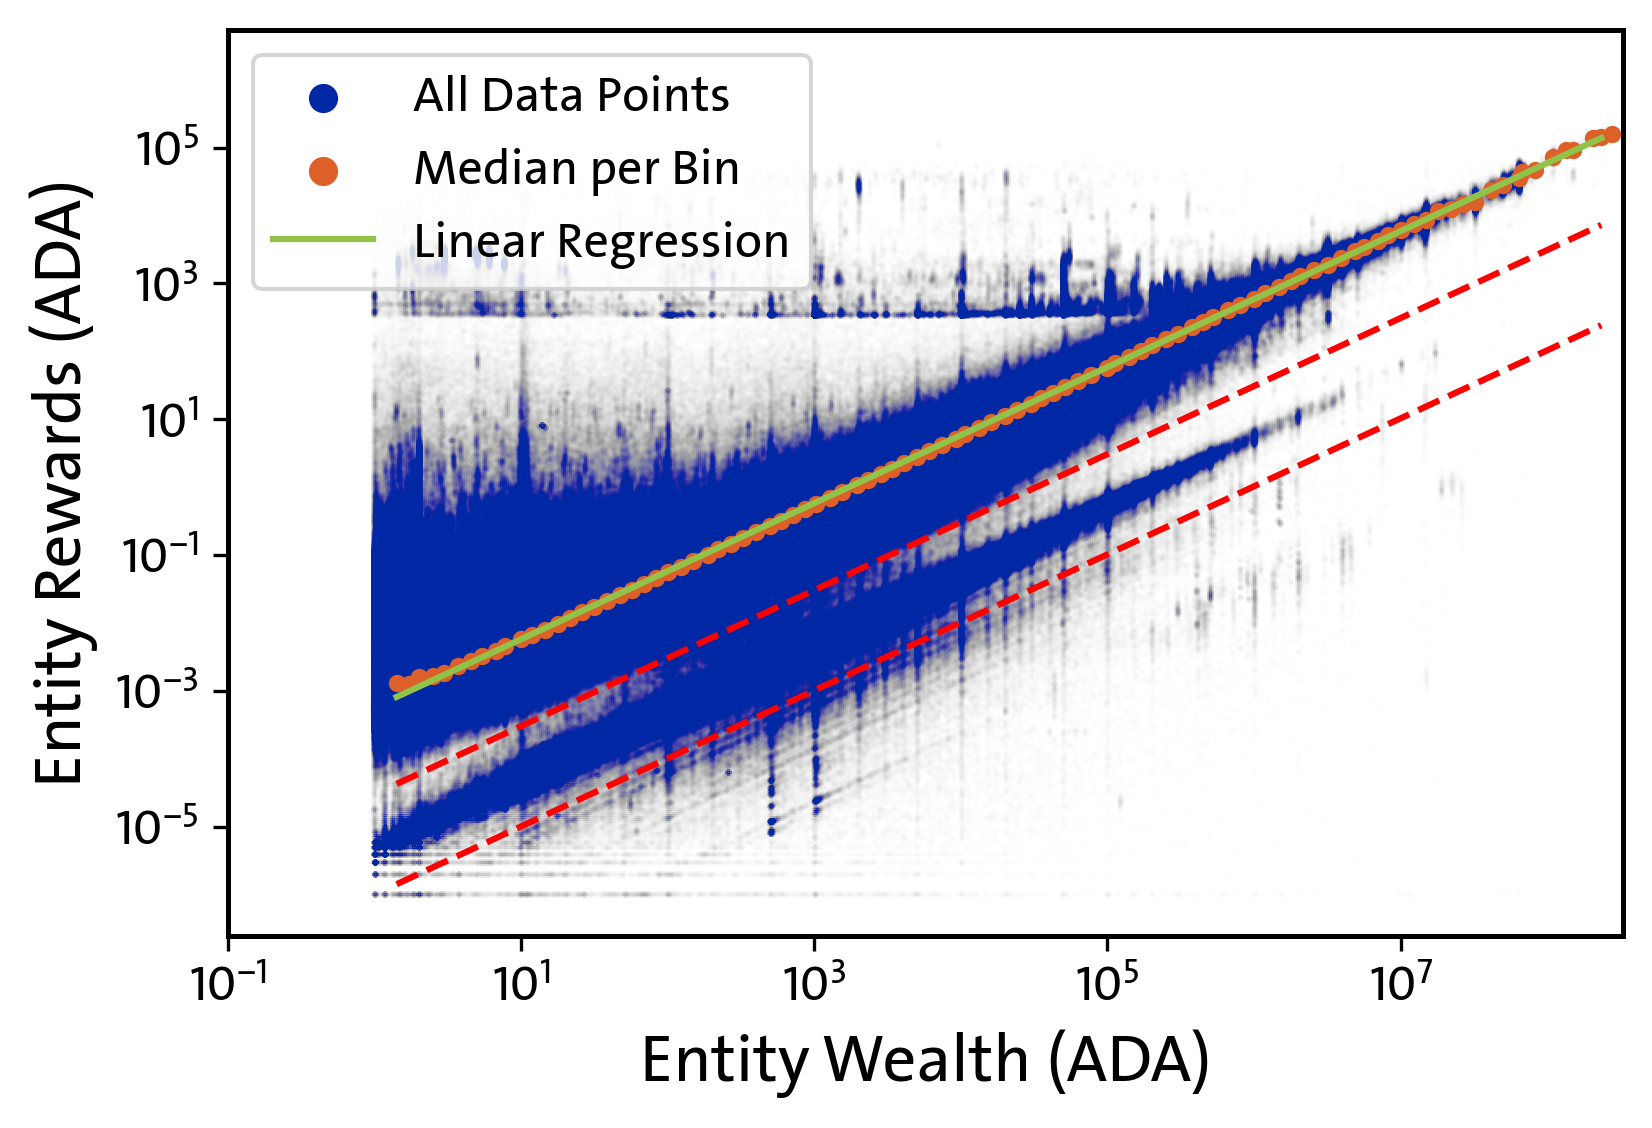

In [177]:
from scipy.stats import linregress
import matplotlib.pyplot as plt


from matplotlib import font_manager
font_dirs = ['/home/user/chegeni/fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/e750b7f7be5a437b0924f5844e9b9313129d0626/uzh.mplstyle')


x = x_rewarded_entities_AllEvents
y = y_rewarded_entities_AllEvents



x = np.array(x, dtype=np.float64)
x = x/(10**6)  # convert lovelace to ADA
y = np.array(y, dtype=np.float64)
y = y/(10**6)  # convert lovelace to ADA



# Replace zeros in y with a very small number
small_number = 1e-6
x[x == 0] = small_number
y[y == 0] = small_number


# Transforming data to log space
log_x = np.log10(x)
log_y = np.log10(y)

# Define bin edges in log space
bin_edges_x = np.logspace(0.1, np.max(log_x), 100)
#bin_edges_y = np.logspace(np.min(log_y), np.max(log_y), 100)

# Digitize/assign each point to a bin
bin_indices_x = np.digitize(log_x, bins=np.log10(bin_edges_x))
#bin_indices_y = np.digitize(log_y, bins=np.log10(bin_edges_y))


# Calculate mean/median in each bin
binned_data = []
for i in tqdm(range(1, len(bin_edges_x))):
    #for j in range(1, len(bin_edges_y)):
        # Find indices for each bin separately
        indices_x = np.where(bin_indices_x == i)
        #indices_y = np.where(bin_indices_y == j)
        
        # Find common indices
        #common_indices = np.intersect1d(indices_x, indices_y)

        if len(indices_x) > 0:
            median_x = np.median(x[indices_x])
            median_y = np.median(y[indices_x])
            binned_data.append((median_x, median_y))



# Extract binned data for plotting
binned_x, binned_y = zip(*binned_data)



# Perform linear regression
log_reg_x = np.log10(binned_x[0:-1])
log_reg_y = np.log10(binned_y[0:-1])
slope, intercept, r_value, p_value, std_err = linregress(log_reg_x, log_reg_y)
print('slope = ',     slope)
print('intercept = ', intercept)
print('r_value = ',   r_value)
print('p_value = ',   p_value)
print('std_err = ',   std_err)


# Create a figure and axis
fig, ax = plt.subplots()


# Create a scatter plot
scatter_plot1 = plt.scatter(x, y,               label='Scatter Plot', marker='o', s=0.5, alpha=0.002)
scatter_plot2 = plt.scatter(binned_x, binned_y, label='Scatter Plot', marker='o', s=10,  alpha=1)
plt.plot([], [])
plt.plot([], [])
plot3,         = plt.plot(10**log_reg_x, (10**intercept) * ((10**log_reg_x)**slope), label='Fitted Line')

plot4,         = plt.plot(10**log_reg_x, (3 * 10**(-5))      * ((10**log_reg_x)**slope), linestyle='--', color='red', label='Threshold')
plot5,         = plt.plot(10**log_reg_x, (1 * 10**(-6))      * ((10**log_reg_x)**slope), linestyle='--', color='red', label='Threshold')



#plt.legend(['All Data Points', 'Median per Bin'], handles=[legend_scatter], fontsize=8, loc ="lower right")
legend_scatter1 = plt.scatter([], [], alpha=1, color=scatter_plot1.get_facecolor()[0], label='All Data Points')
legend_scatter2 = plt.scatter([], [], alpha=1, color=scatter_plot2.get_facecolor()[0], label='Median per Bin')
legend_plot3    = plt.Line2D([], [], color=plot3.get_color(), label='Linear Regression')
plt.legend(handles=[legend_scatter1, legend_scatter2, legend_plot3], loc ="upper left")
legend_scatter1.remove()
legend_scatter2.remove()
#plt.legend(['Active Pools', 'Rewarded Pools'], loc ="lower right")



plt.xlabel('Entity Wealth (ADA)')
plt.ylabel('Entity Rewards (ADA)')


plt.xlim(left=0.1) #, int(10 * 10**6))
#plt.ylim(bottom=0.1) #, int(10 * 10**6))

plt.xscale('log')
plt.yscale('log')


# Show the plot
plt.savefig('fig_entities_rewards_vs_entityWealth_with_THRESHOLD.png', bbox_inches='tight', facecolor='white')
plt.show()



In [30]:
# Load "cardano_pools_4.csv":


file_name = BASE_ADDRESS + '/cardano_pools_4.csv'
df = pd.read_csv(file_name, delimiter='|')


##########################################################################################

print('----------------------')
print('done!')



----------------------
done!


In [179]:


first_epoch_no = 210
last_epoch_no  = 391
FIRST_DATE_POOLS_STAKING = datetime.datetime.strptime('2020-08-08 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 210
LAST_DATE_POOLS_STAKING  = datetime.datetime.strptime('2023-01-30 21:46:16', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 391


LOW_POOLS__LIST__perEPOCH = [set() for _ in range(first_epoch_no, last_epoch_no+1)]


for epoch in tqdm(range(first_epoch_no, last_epoch_no+1)):
    
    filtered_df = df.loc[df['EPOCH'] == epoch]
    LOW_POOLS_SET = set()

    for index, row in filtered_df.iterrows():
        ##########################################################################################
        EPOCH             = int(  df.loc[index ,  'EPOCH']             )
        POOL_ID           = int(  df.loc[index ,  'POOL_ID']           )
        POOL_HASH_BECH32  =       df.loc[index ,  'POOL_HASH_BECH32']
        POOL_STAKES       = int(  df.loc[index ,  'POOL_STAKES']       )
        POOL_REWARDS      = int(  df.loc[index ,  'POOL_REWARDS']      )
        NUM_OF_DELEGATORS = int(  df.loc[index ,  'NUM_OF_DELEGATORS'] )
        NUM_OF_REWARDERS  = int(  df.loc[index ,  'NUM_OF_REWARDERS']  )
        DELEGATORs        = list( df.loc[index , 'DELEGATORs'].split(';') )
        if(not pd.isna(df.loc[index, 'REWARDERs'])):
            REWARDERs     = list( df.loc[index , 'REWARDERs'].split(';') )
        else:
            REWARDERs     = list()
            continue;

        ##########################################################################################
        delegator_dict = {delegator.split(',')[0]: int(delegator.split(',')[1]) for delegator in DELEGATORs}
        rewarder_dict  = {rewarder.split(',')[0]:  int(rewarder.split(',')[1])  for rewarder  in REWARDERs}

        for key in rewarder_dict:
            if key in delegator_dict:
                reward_amount     = rewarder_dict [key]
                deleg_amount      = delegator_dict[key]

                if (deleg_amount>0) and (reward_amount>0) and (reward_amount/deleg_amount < 3 * 10**(-5)) and (reward_amount/deleg_amount > 10**(-6)):
                    LOW_POOLS_SET.add(POOL_ID)

    ##########################################################################################
    LOW_POOLS__LIST__perEPOCH[epoch - first_epoch_no] = LOW_POOLS_SET



##########################################################################################
print('----------------------')
print('done!')



100%|██████████| 182/182 [05:00<00:00,  1.65s/it]

----------------------
done!


In [180]:
# Find periodic/cumulative number of "Low-Reward Pools":

# Initialize the cumulative list of sets
cumulative_LOW_POOLS__LIST__perEPOCH = []


# Initialize the current cumulative set
current_cumulative_set = set()


# Iterate through the original list and accumulate sets
for pool_set in tqdm(LOW_POOLS__LIST__perEPOCH):
    current_cumulative_set = current_cumulative_set.union(pool_set)
    cumulative_LOW_POOLS__LIST__perEPOCH.append(current_cumulative_set.copy())



num_of_LOW_POOLS__LIST__perEPOCH             = [len(s) for s in LOW_POOLS__LIST__perEPOCH]
num_of_LOW_POOLS__LIST__perEPOCH__cumulative = [len(s) for s in cumulative_LOW_POOLS__LIST__perEPOCH]



##########################################################################################
print('----------------------')
print('done!')




100%|██████████| 182/182 [00:00<00:00, 274788.81it/s]

----------------------
done!


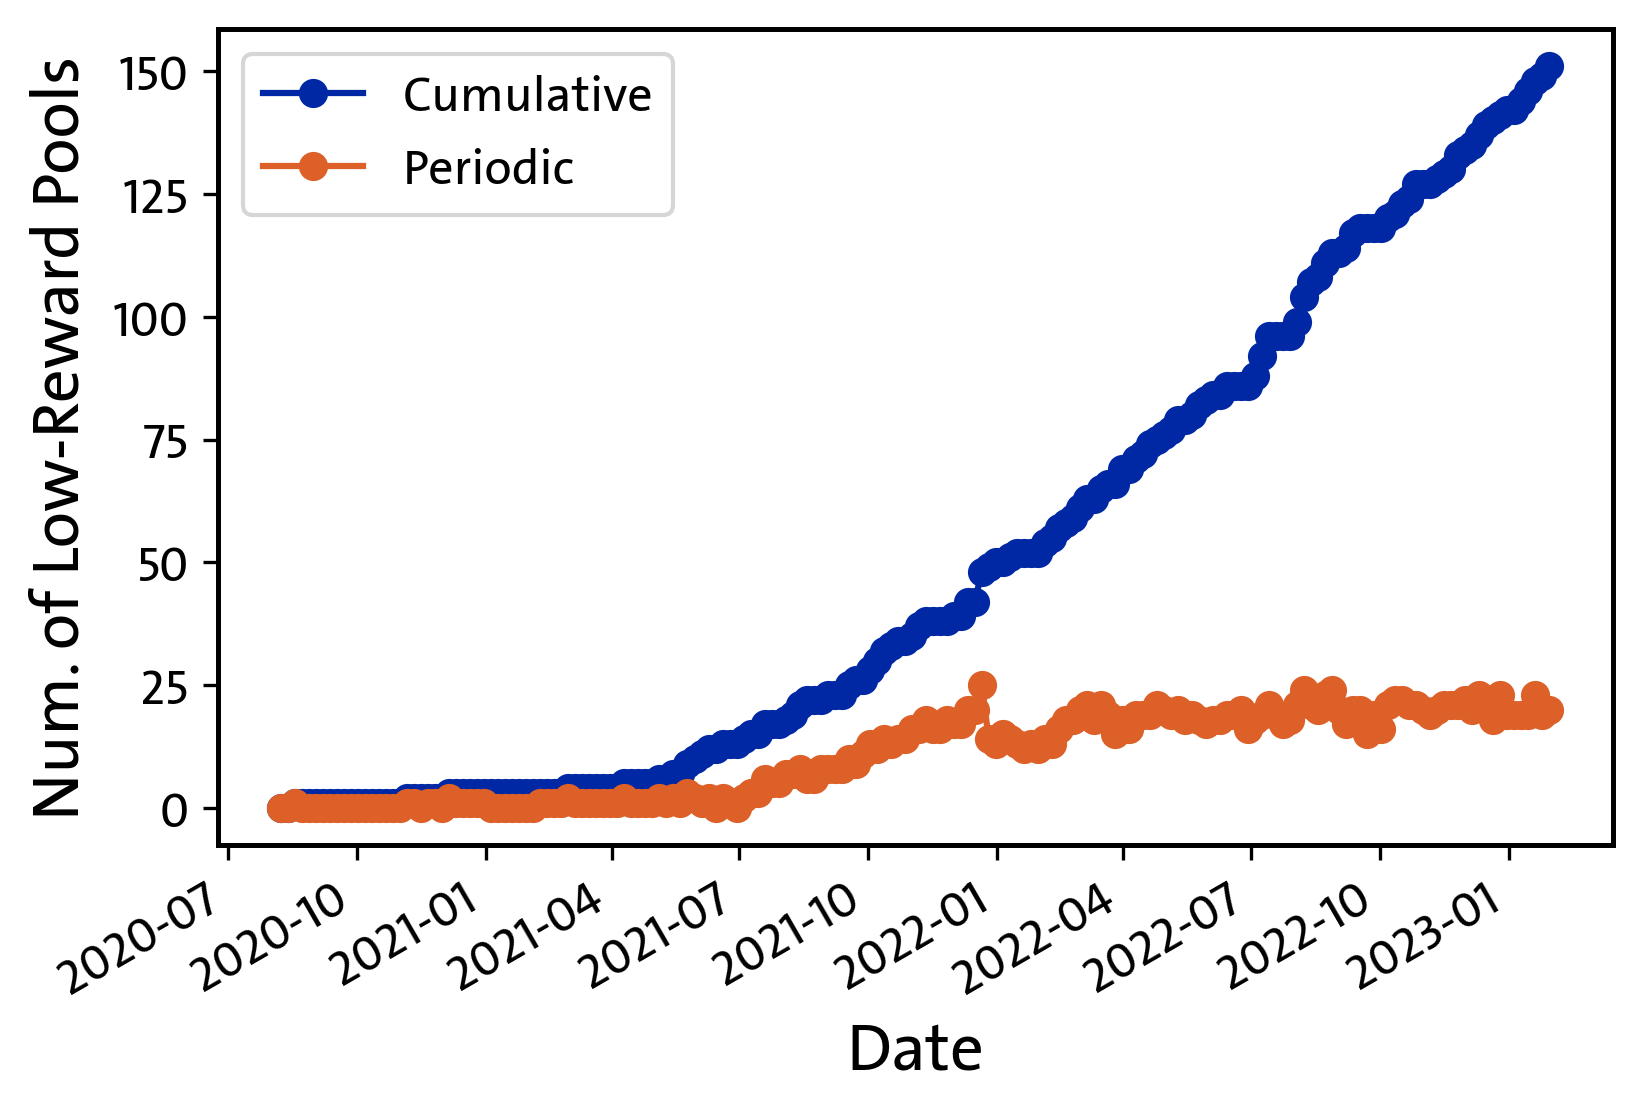

In [203]:

from matplotlib import font_manager
font_dirs = ['/home/user/chegeni/fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/e750b7f7be5a437b0924f5844e9b9313129d0626/uzh.mplstyle')


first_epoch_no = 210
last_epoch_no  = 391
FIRST_DATE_POOLS_STAKING = datetime.datetime.strptime('2020-08-08 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 210
LAST_DATE_POOLS_STAKING  = datetime.datetime.strptime('2023-01-30 21:46:16', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 391



#total_num_of_epochs = int(int((LAST_DATE_POOLS_STAKING - FIRST_DATE_POOLS_STAKING).total_seconds()/86400)/5) + 1
total_num_of_epochs = int(last_epoch_no - first_epoch_no + 1)

epochs_array      = list(range(first_epoch_no, last_epoch_no+1))
epochs_date_array = [0]*len(epochs_array)
for i in range(len(epochs_date_array)):
    epochs_date_array[i] = FIRST_DATE_POOLS_STAKING + datetime.timedelta(days=(i*5))


date_list = [str(epochs_date_array[i]) for i in range(len(epochs_date_array))]
date_list = pd.to_datetime(date_list)


# Plotting the lengths of sets:
DF = pd.DataFrame()
DF = pd.DataFrame(num_of_LOW_POOLS__LIST__perEPOCH__cumulative, columns=['value1'])
DF['value2'] = pd.DataFrame(num_of_LOW_POOLS__LIST__perEPOCH)

DF = DF.set_index(date_list)
plt.plot(DF, marker='o')
plt.gcf().autofmt_xdate()


# Function add a legend 
plt.legend(['Cumulative', 'Periodic'], loc ="upper left")

plt.xlabel('Date')
plt.ylabel('Num. of Low-Reward Pools')


# linear", "log", "symlog", "logit
#plt.xscale("linear")
#plt.yscale("log")

#plt.xlim(0, 60)
#plt.ylim(0, 60)



# Show the plot
plt.savefig('fig_num_of_LOW_POOLS.pdf', bbox_inches='tight', facecolor='white')
plt.show()




----------------------
Number of Pools being Low-Reward in more than 57 epochs:  10
TOP10_LOW_POOLS (POOL_ID):  {1347, 4804, 3974, 5095, 4712, 4365, 4662, 4182, 4312, 4862}
----------------------


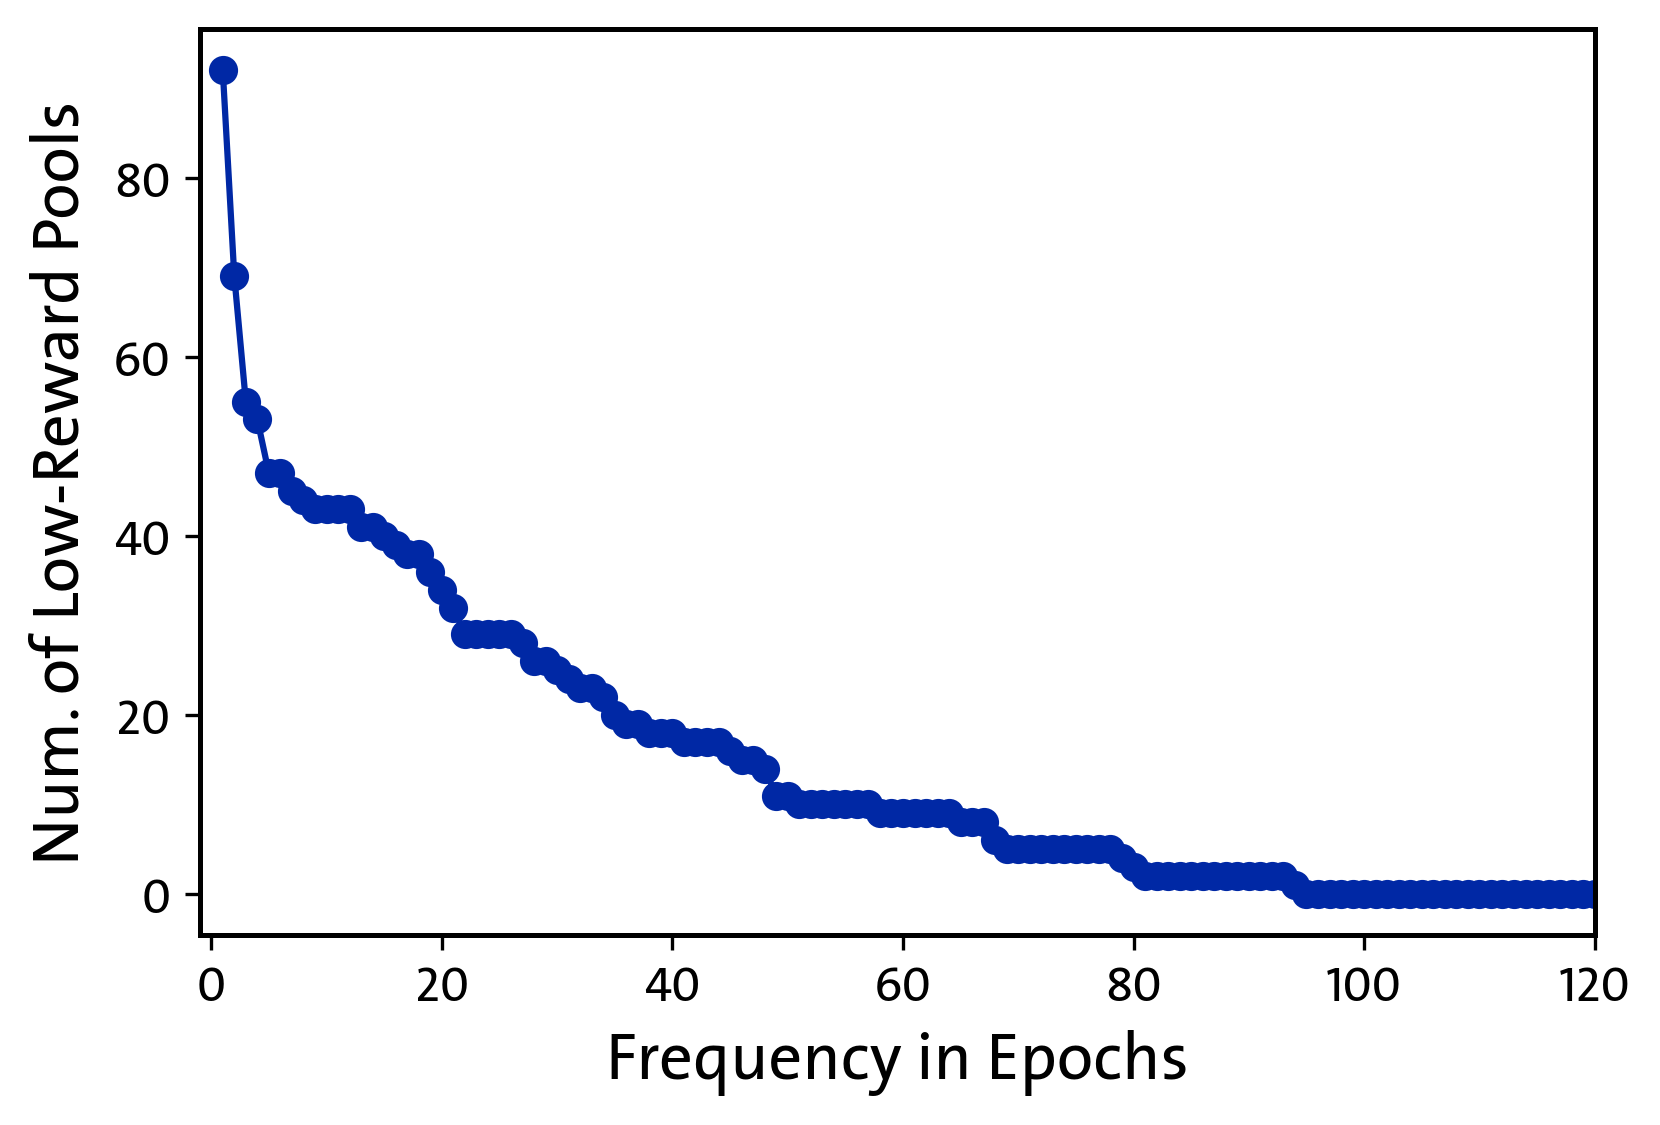

In [219]:
# Find Number of pools that have appeared in more than "THRESHOLD" epochs as "Low-Reward Pools":



import matplotlib.pyplot as plt

# Count the occurrence of each "POOL_ID":
element_count = {}
for pool_set in LOW_POOLS__LIST__perEPOCH:
    for element in pool_set:
        element_count[element] = element_count.get(element, 0) + 1


# Calculate the number of elements exceeding each THRESHOLD:
threshold_values = range(1, 181)

num_elements_above_threshold = []
for threshold in threshold_values:
    elements_above_threshold = {element for element, count in element_count.items() if count > threshold}
    num_elements_above_threshold.append(len(elements_above_threshold))

    
    
# Find "Top 10 Pools" that have appeared in more than 145 epochs as "Low-Reward Pools":
print('----------------------')
THRESHOLD = 57
print('Number of Pools being Low-Reward in more than ' + str(THRESHOLD) + ' epochs: ', num_elements_above_threshold[THRESHOLD-1])
TOP10_LOW_POOLS = {element for element, count in element_count.items() if count > THRESHOLD}
print('TOP10_LOW_POOLS (POOL_ID): ', TOP10_LOW_POOLS)


    
    
    
    
print('----------------------')
# Plot the result
plt.plot(threshold_values, num_elements_above_threshold, marker='o')
plt.xlabel('Frequency in Epochs')
plt.ylabel('Num. of Low-Reward Pools')

plt.xlim(-1,120)
#plt.yscale('log')
#plt.grid(True)


plt.savefig('fig_num_of_LOW_POOLS_VS_Frequency_in_epochs.pdf', bbox_inches='tight', facecolor='white')
plt.show()





In [ ]:

'''

utxoexplorer=> select * from pool_hash where id IN (1347, 4804, 3974, 5095, 4712, 4365, 4662, 4182, 4312, 4862);
  id  |                          hash_raw                          |                           view                           
------+------------------------------------------------------------+----------------------------------------------------------
 1347 | \x6622bb2a073669662fed0eff7b22539af53b7ff9610901659d0a1e07 | pool1vc3tk2s8xe5kvtldpmlhkgjnnt6nkllevyyszevapg0qwn0ch29
 3974 | \x34f513d0f993d188557696d598f54944879c24cb60811aea840fce47 | pool1xn63858ej0gcs4tkjm2e3a2fgjrecfxtvzq3465ypl8ywkx7gcv
 4182 | \xc48ed34a5f24ca6dcbac194e45ed9f0b6ac720018eac038ffa9488bd | pool1cj8dxjjlyn9xmjavr98ytmvlpd4vwgqp36kq8rl6jjyt6k2adfh
 4312 | \x0c7173112ca61362d2ee05040973f2184968f2d4e769df86671c916b | pool1p3chxyfv5cfk95hwq5zqjuljrpyk3uk5ua5alpn8rjgkkvvy8ne
 4365 | \x87dc693d71a7a9f33c69728d1179a04ab520fe14d682d711acfd9f24 | pool1slwxj0t3575lx0rfw2x3z7dqf26jpls566pdwydvlk0jgw96lre
 4662 | \xc485ab20bd3f105e59f3c50a0d3fbaf615a51f70a1c6d29d00a1fd27 | pool1cjz6kg9a8ug9uk0nc59q60a67c2628ms58rd98gq587jwa2x5qt
 4712 | \x126f84b8f88fd0f65de921ef521f2aa637e5e465cea06042c103fe22 | pool1zfhcfw8c3lg0vh0fy8h4y8e25cm7ter9e6sxqskpq0lzyy2wzvm
 4804 | \x0ef395f417fc1b8a124784c279575708e05d8917363fa8b3172d1631 | pool1pmeetaqhlsdc5yj8snp8j46hprs9mzghxcl63vch95trz3xwpln
 4862 | \xc80d3b1f64feed0697bb97c97867a63ff1c33cb8b472bc33fdfa457e | pool1eqxnk8mylmksd9amjlyhseax8lcux09ck3etcvlalfzhuu7qvzp
 5095 | \xba90de47f28afe4bf8b3b999af16b31c233a631b962e47b9483477f4 | pool1h2gdu3lj3tlyh79nhxv6794nrs3n5ccmjchy0w2gx3mlg79jtvr
(10 rows)

'''




In [214]:

low_reward_pool_id_set = TOP10_LOW_POOLS


#filtered_df = df.loc[(df['EPOCH'] == 300) & (df['POOL_ID'].isin(low_reward_pool_id_set))]
filtered_df = df.loc[(df['POOL_ID'].isin(low_reward_pool_id_set))]



LOW_POOLS__stakeAddr_deleg_amount_LIST  = []
LOW_POOLS__stakeAddr_reward_amount_LIST = []


for index, row in tqdm(filtered_df.iterrows()):
    ##########################################################################################
    EPOCH             = int(  df.loc[index ,  'EPOCH']             )
    POOL_ID           = int(  df.loc[index ,  'POOL_ID']           )
    POOL_HASH_BECH32  =       df.loc[index ,  'POOL_HASH_BECH32']
    POOL_STAKES       = int(  df.loc[index ,  'POOL_STAKES']       )
    POOL_REWARDS      = int(  df.loc[index ,  'POOL_REWARDS']      )
    NUM_OF_DELEGATORS = int(  df.loc[index ,  'NUM_OF_DELEGATORS'] )
    NUM_OF_REWARDERS  = int(  df.loc[index ,  'NUM_OF_REWARDERS']  )
    DELEGATORs        = list( df.loc[index , 'DELEGATORs'].split(';') )
    if(not pd.isna(df.loc[index, 'REWARDERs'])):
        REWARDERs     = list( df.loc[index , 'REWARDERs'].split(';') )
    else:
        REWARDERs     = list()
        continue;
        
    ##########################################################################################
    delegator_dict = {delegator.split(',')[0]: int(delegator.split(',')[1]) for delegator in DELEGATORs}
    rewarder_dict  = {rewarder.split(',')[0]:  int(rewarder.split(',')[1])  for rewarder  in REWARDERs}

    for key in rewarder_dict:
        if key in delegator_dict:
            LOW_POOLS__stakeAddr_deleg_amount_LIST.append(delegator_dict[key])
            LOW_POOLS__stakeAddr_reward_amount_LIST.append(rewarder_dict [key])

            '''
            if reward_amount/deleg_amount > 0.0007:
                print(reward_type, 
                      str(EPOCH).rjust(5), 
                      str(POOL_ID).rjust(5), 
                      str(POOL_STAKES).rjust(15), 
                      str(POOL_REWARDS).rjust(10), 
                      ' | pool ratio = ',    format(POOL_REWARDS/POOL_STAKES, '.7f'),
                      ' | stake_addr_id = ', str(key).rjust(10),
                      ' | deleg_amount = ',  str(deleg_amount).rjust(15), 
                      ' | reward_amount = ', str(reward_amount).rjust(15), 
                      ' | address ratio = ', format(reward_amount/deleg_amount, '.7f'),
                )
            '''

##########################################################################################
print('----------------------')
print('done!')



963it [00:02, 421.34it/s] 

----------------------
done!


100%|██████████| 29/29 [00:00<00:00, 372.97it/s]


slope =  0.9797166433461371
intercept =  -5.241322113834516
r_value =  0.9981047727616297
p_value =  5.1130205704957056e-33
std_err =  0.011846156147563583


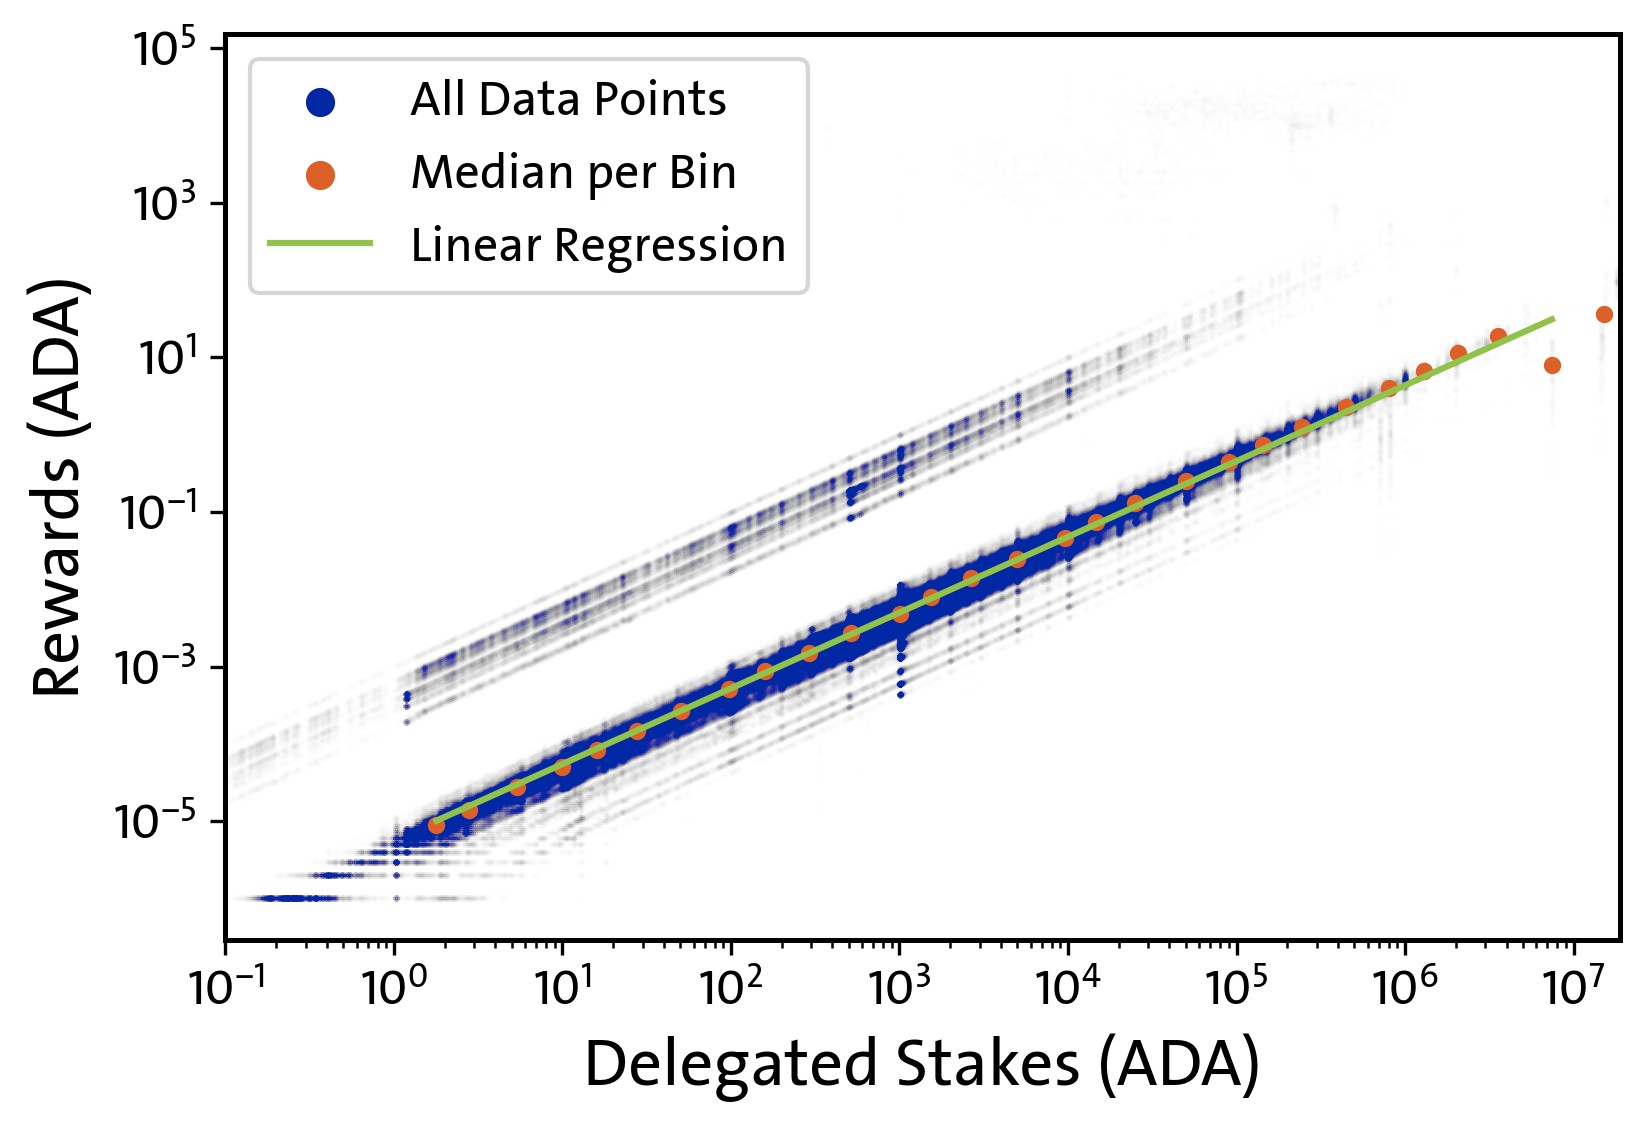

In [217]:
# Plot "reward amount vs deleg_amount" of StakeAddresses for "Low-Reward Pools":

from scipy.stats import linregress
import matplotlib.pyplot as plt


from matplotlib import font_manager
font_dirs = ['/home/user/chegeni/fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/e750b7f7be5a437b0924f5844e9b9313129d0626/uzh.mplstyle')


x = LOW_POOLS__stakeAddr_deleg_amount_LIST
y = LOW_POOLS__stakeAddr_reward_amount_LIST



x = np.array(x, dtype=np.float64)
x = x/(10**6)  # convert lovelace to ADA
y = np.array(y, dtype=np.float64)
y = y/(10**6)  # convert lovelace to ADA



# Replace zeros in y with a very small number
small_number = 1e-6
x[x == 0] = small_number
y[y == 0] = small_number


# Transforming data to log space
log_x = np.log10(x)
log_y = np.log10(y)

# Define bin edges in log space
bin_edges_x = np.logspace(0.1, np.max(log_x), 30)
#bin_edges_y = np.logspace(np.min(log_y), np.max(log_y), 100)

# Digitize/assign each point to a bin
bin_indices_x = np.digitize(log_x, bins=np.log10(bin_edges_x))
#bin_indices_y = np.digitize(log_y, bins=np.log10(bin_edges_y))


# Calculate mean/median in each bin
binned_data = []
for i in tqdm(range(1, len(bin_edges_x))):
    #for j in range(1, len(bin_edges_y)):
        # Find indices for each bin separately
        indices_x = np.where(bin_indices_x == i)
        #indices_y = np.where(bin_indices_y == j)
        
        # Find common indices
        #common_indices = np.intersect1d(indices_x, indices_y)

        if len(indices_x) > 0:
            median_x = np.median(x[indices_x])
            median_y = np.median(y[indices_x])
            binned_data.append((median_x, median_y))



# Extract binned data for plotting
binned_x, binned_y = zip(*binned_data)



# Perform linear regression
log_reg_x = np.log10(binned_x[0:-1])
log_reg_y = np.log10(binned_y[0:-1])
slope, intercept, r_value, p_value, std_err = linregress(log_reg_x, log_reg_y)
print('slope = ',     slope)
print('intercept = ', intercept)
print('r_value = ',   r_value)
print('p_value = ',   p_value)
print('std_err = ',   std_err)


# Create a figure and axis
fig, ax = plt.subplots()


# Create a scatter plot
scatter_plot1 = plt.scatter(x, y,               label='Scatter Plot', marker='o', s=0.5, alpha=0.002)
scatter_plot2 = plt.scatter(binned_x, binned_y, label='Scatter Plot', marker='o', s=10,  alpha=1)
plt.plot([], [])
plt.plot([], [])
plot3,         = plt.plot(10**log_reg_x, (10**intercept) * ((10**log_reg_x)**slope), label='Fitted Line')


#plt.legend(['All Data Points', 'Median per Bin'], handles=[legend_scatter], fontsize=8, loc ="lower right")
legend_scatter1 = plt.scatter([], [], alpha=1, color=scatter_plot1.get_facecolor()[0], label='All Data Points')
legend_scatter2 = plt.scatter([], [], alpha=1, color=scatter_plot2.get_facecolor()[0], label='Median per Bin')
legend_plot3    = plt.Line2D([], [], color=plot3.get_color(), label='Linear Regression')
plt.legend(handles=[legend_scatter1, legend_scatter2, legend_plot3], loc ="upper left")
legend_scatter1.remove()
legend_scatter2.remove()
#plt.legend(['Active Pools', 'Rewarded Pools'], loc ="lower right")



plt.xlabel('Delegated Stakes (ADA)')
plt.ylabel('Rewards (ADA)')


plt.xlim(left=0.1) #, int(10 * 10**6))
#plt.ylim(bottom=0.1) #, int(10 * 10**6))

plt.xscale('log')
plt.yscale('log')


# Show the plot
plt.savefig('fig_LOW_POOLS__stakeAddress_rewards_vs_stakeAddress_delegations.png', bbox_inches='tight', facecolor='white')
plt.show()




In [ ]:
# Calculate "Pool Delegation"                                              vs "Entity Wealth" for all delegation events in all epochs:
# Calculate "Number of Pools received Delegation from an Entity per epoch" vs "Entity Wealth" for all delegation events in all epochs:


from collections import defaultdict

print('----------------------')

# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)
print('----------------------')



first_epoch_no = 210
last_epoch_no  = 391
FIRST_DATE_POOLS_STAKING = datetime.datetime.strptime('2020-08-08 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 210
LAST_DATE_POOLS_STAKING  = datetime.datetime.strptime('2023-01-30 21:46:16', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 391



#total_num_of_epochs = int(int((LAST_DATE_POOLS_STAKING - FIRST_DATE_POOLS_STAKING).total_seconds()/86400)/5) + 1
total_num_of_epochs = int(last_epoch_no - first_epoch_no + 1)

epochs_array      = list(range(first_epoch_no, last_epoch_no+1))
epochs_date_array = [0]*len(epochs_array)
for i in range(len(epochs_date_array)):
    epochs_date_array[i] = FIRST_DATE_POOLS_STAKING + datetime.timedelta(days=(i*5))



file_name = BASE_ADDRESS + '/cardano_pools_4.csv'
df = pd.read_csv(file_name, delimiter='|')



clustering_array = clustering_array_heur1and2
current_epoch    = first_epoch_no

current_day      = current_epoch * 5
file_name = BASE_ADDRESS + '/YuZhang_Cardano_Balances_Entities/BalancesPerEntityDay_' + str(current_day).zfill(4) + '__Cardano_TXs_All.txt'
entities_wealth_per_epoch = load_file_to_array(file_name)



#entityWealth_to_poolStake_delegationEvents_ALL      = []
#entityWealth_to_poolStake_delegationEvents_perEpoch = []

#entity_to_numOf_pool_deleg_AllEvents = []
#entity_to_pool_deleg_perEpoch        = []

rewarded_entities_perEpoch  = []
#rewarded_entities_AllEvents = []



for index, row in tqdm(df.iterrows()):
    ##########################################################################################
    EPOCH             = int(  df.loc[index ,  'EPOCH']             )
    POOL_ID           = int(  df.loc[index ,  'POOL_ID']           )
    POOL_HASH_BECH32  =       df.loc[index ,  'POOL_HASH_BECH32']
    POOL_STAKES       = int(  df.loc[index ,  'POOL_STAKES']       )
    POOL_REWARDS      = int(  df.loc[index ,  'POOL_REWARDS']      )
    NUM_OF_DELEGATORS = int(  df.loc[index ,  'NUM_OF_DELEGATORS'] )
    NUM_OF_REWARDERS  = int(  df.loc[index ,  'NUM_OF_REWARDERS']  )
    #DELEGATORs        = list( df.loc[index , 'DELEGATORs'].split(';') )
    if(not pd.isna(df.loc[index, 'REWARDERs'])):
        REWARDERs     = list( df.loc[index , 'REWARDERs'].split(';') )
    else:
        REWARDERs     = list()

    ##########################################################################################
    if(EPOCH < first_epoch_no):
        continue;
    ##########################################################################################
    if(EPOCH > current_epoch):
        #entityWealth_to_poolStake_delegationEvents_ALL.extend(entityWealth_to_poolStake_delegationEvents_perEpoch)
        #entityWealth_to_poolStake_delegationEvents_perEpoch = []
        
        #entity_pools = defaultdict(set)
        #for entity_indx, pool_id in entity_to_pool_deleg_perEpoch:
        #    entity_pools[entity_indx].add(pool_id)
        #entity_to_numOf_pool_deleg_AllEvents.extend([(entities_wealth_per_epoch[entity_indx][0], len(pools)) for entity_indx, pools in entity_pools.items()])
        #entity_to_pool_deleg_perEpoch = []

        entity_rewards = defaultdict(set)
        for entity_indx, reward_amount in rewarded_entities_perEpoch:
            entity_rewards[entity_indx].add(reward_amount)
        #rewarded_entities_AllEvents.extend([(entities_wealth_per_epoch[entity_indx][0], sum(reward_amounts)) for entity_indx, reward_amounts in entity_rewards.items()])
        rewarded_entities_events_per_epoch = [(entities_wealth_per_epoch[entity_indx][0], sum(reward_amounts), entity_indx) for entity_indx, reward_amounts in entity_rewards.items()]
        file_name = BASE_ADDRESS + '/rewarded_entities_AllEvents/Rewarded_Entities_Events__Epoch_' + str(current_epoch).zfill(4) + '__Cardano_TXs_All.pickle'
        pickle.dump(rewarded_entities_events_per_epoch, open(file_name, 'wb'))
        rewarded_entities_perEpoch = []

        current_epoch      = EPOCH

        current_day        = (current_epoch * 5) + 1
        if(current_day <= 1945):
            file_name = BASE_ADDRESS + '/YuZhang_Cardano_Balances_Entities/BalancesPerEntityDay_' + str(current_day).zfill(4) + '__Cardano_TXs_All.txt'
            entities_wealth_per_epoch = load_file_to_array(file_name)

    ##########################################################################################
    if(EPOCH > last_epoch_no):
        break;

    ##########################################################################################
    #delegator_entities_to_this_pool_per_epoch_SET  = set()
    #
    #for delegator in DELEGATORs:
    #    #temp_str          = delegator.split(',')
    #    deleg_addr_id     =      delegator.split(',')[0]
    #    deleg_amount      = int( delegator.split(',')[1] )
    #    deleg_stake_addr  =      delegator.split(',')[2]
    #    
    #    deleg_addr_indx   = BinarySearch(unique_delegation_addresses, deleg_stake_addr, debug=False)
    #    if(deleg_addr_indx != -1):
    #        deleg_entity_indx = entity_of_stake_addresses[deleg_addr_indx][0]        
    #        delegator_entities_to_this_pool_per_epoch_SET.add(deleg_entity_indx)
    #
    #for entity_indx in delegator_entities_to_this_pool_per_epoch_SET:
    #    if (entity_indx < len(entities_wealth_per_epoch)):
    #        entityWealth_to_poolStake_delegationEvents_perEpoch.append((entities_wealth_per_epoch[entity_indx][0], POOL_STAKES))
    #        entity_to_pool_deleg_perEpoch.append((entity_indx, POOL_ID))



    for rewarder in REWARDERs:
        #temp_str          = rewarder.split(',')
        reward_addr_id    =      rewarder.split(',')[0]
        reward_amount     = int( rewarder.split(',')[1] )
        reward_stake_addr =      rewarder.split(',')[2]
     
        reward_addr_indx   = BinarySearch(unique_delegation_addresses, reward_stake_addr, debug=False)
        if(reward_addr_indx != -1):
            reward_entity_indx = entity_of_stake_addresses[reward_addr_indx][0]
            if (reward_entity_indx < len(entities_wealth_per_epoch)):
                rewarded_entities_perEpoch.append((reward_entity_indx, reward_amount))

    ##########################################################################################
    #active_delegator_addresses_per_epoch[EPOCH - first_epoch_no] = active_delegator_addresses_per_epoch[EPOCH - first_epoch_no] + NUM_OF_DELEGATORS

    ##########################################################################################




et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)
print('----------------------')
print('done!')




In [112]:
# Find Entities with lower rewards in epoch XXXX:


epoch = 350

rewarded_entities_events_per_epoch = []
file_name = BASE_ADDRESS + '/rewarded_entities_AllEvents/Rewarded_Entities_Events__Epoch_' + str(epoch).zfill(4) + '__Cardano_TXs_All.pickle'
rewarded_entities_events_per_epoch.extend(pickle.load(open(file_name, 'rb')))

file_name = BASE_ADDRESS + '/YuZhang_Cardano_StakeDelegation_Entities/StakeDelegPerEntityEpoch_' + str(epoch).zfill(4) + '__Cardano_TXs_All.txt'
stakeDeleg_entities_per_epoch = load_file_to_array(file_name)


entity_wealth, reward_amount, entity_indx = zip(*rewarded_entities_events_per_epoch)




x_all = entity_wealth
y_all = reward_amount
z_all = entity_indx

print(len(x_all), len(y_all), len(rewarded_entities_events_per_epoch), len(stakeDeleg_entities_per_epoch))


# Find entities who received smaller rewards:

cnt_low_reward  = 0
cnt_high_reward = 0


low_reawrd_entities_SET = set()
low_reward_events_SET = set()

high_reawrd_entities_SET = set()
high_reward_events_SET = set()


for i in tqdm(range(len(rewarded_entities_events_per_epoch))):
    if ( reward_amount[i] < ((10**(-5)) * entity_wealth[i]) ) and ( reward_amount[i] > ((10**(-6)) * entity_wealth[i]) ):
        cnt_low_reward += 1
        low_reawrd_entities_SET.add(entity_indx[i])
        low_reward_events_SET.add(i)

    elif ( reward_amount[i] > ((10**(-5)) * entity_wealth[i]) ):
        cnt_high_reward += 1
        high_reawrd_entities_SET.add(entity_indx[i])
        high_reward_events_SET.add(i)

print('cnt_low_reward  = ', cnt_low_reward)
print('cnt_high_reward = ', cnt_high_reward)
print('len(low_reawrd_entities_SET) = ', len(low_reawrd_entities_SET))
print('len(low_reward_events_SET) = ', len(low_reward_events_SET))
print('len(high_reawrd_entities_SET) = ', len(high_reawrd_entities_SET))
print('len(high_reward_events_SET) = ', len(high_reward_events_SET))



1119309 1119309 1119309 8805791


100%|██████████| 1119309/1119309 [00:04<00:00, 230437.66it/s]

cnt_low_reward  =  21656
cnt_high_reward =  1096811
len(low_reawrd_entities_SET) =  21656
len(low_reward_events_SET) =  21656
len(high_reawrd_entities_SET) =  1096811
len(high_reward_events_SET) =  1096811


In [113]:
print('entity_indx = ', entity_indx[444790])
print('entity_wealth = ', entity_wealth[444790])
print('reward_amount = ', reward_amount[444790])



entity_indx =  48
entity_wealth =  2005520001472
reward_amount =  11019030


In [125]:
low_rew_ent_350 = [ 262198,
                    6946892,
                    393297,
                    8126548,
                    262228,
                    917591,
                    96,
                    917603,
                    2228324,
                    393317,
                    101
                  ]



In [124]:
index = entity_indx.index(262198)
index, entity_wealth[index], reward_amount[index], reward_amount[index]/entity_wealth[index]


(580615, 2257455412, 11260, 4.987916899773523e-06)

In [ ]:
curr_epoch = 350


for i in low_rew_ent_350:
    index = entity_indx.index(i)
    print('index = ', index)
    
    for current_day in range((curr_epoch * 5) - 10, (curr_epoch * 5) + 10):
        if(current_day <= 1945):
            file_name = BASE_ADDRESS + '/YuZhang_Cardano_Balances_Entities/BalancesPerEntityDay_' + str(current_day).zfill(4) + '__Cardano_TXs_All.txt'
            entities_wealth_per_epoch = load_file_to_array(file_name)

        print('current_day = ', current_day, '  | wealth = ', entities_wealth_per_epoch[i], '  | ratio = ', float(reward_amount[index]/entities_wealth_per_epoch[i]))
    print('==============================================================================================================')



In [102]:


from collections import defaultdict


print('----------------------')
ct = datetime.datetime.now()
print("current time: ", ct)
print('----------------------')



filtered_df = df.loc[df['EPOCH'] == epoch]

low_reward_pools_SET  = set()
high_reward_pools_SET = set()

low_reward_types_DICT  = defaultdict(int)
high_reward_types_DICT = defaultdict(int)



for index, row in tqdm(filtered_df.iterrows()):
    ##########################################################################################
    EPOCH             = int(  df.loc[index ,  'EPOCH']             )
    POOL_ID           = int(  df.loc[index ,  'POOL_ID']           )
    POOL_HASH_BECH32  =       df.loc[index ,  'POOL_HASH_BECH32']
    POOL_STAKES       = int(  df.loc[index ,  'POOL_STAKES']       )
    POOL_REWARDS      = int(  df.loc[index ,  'POOL_REWARDS']      )
    NUM_OF_DELEGATORS = int(  df.loc[index ,  'NUM_OF_DELEGATORS'] )
    NUM_OF_REWARDERS  = int(  df.loc[index ,  'NUM_OF_REWARDERS']  )
    DELEGATORs        = list( df.loc[index , 'DELEGATORs'].split(';') )
    if(not pd.isna(df.loc[index, 'REWARDERs'])):
        REWARDERs     = list( df.loc[index , 'REWARDERs'].split(';') )
    else:
        REWARDERs     = list()

    ##########################################################################################
    if(EPOCH != epoch):
        continue;

    ##########################################################################################
    #for delegator in DELEGATORs:
    #    deleg_addr_id     =      delegator.split(',')[0]
    #    deleg_amount      = int( delegator.split(',')[1] )
    #    deleg_stake_addr  =      delegator.split(',')[2]
    #    
    #    deleg_addr_indx   = BinarySearch(unique_delegation_addresses, deleg_stake_addr, debug=False)
    #    if(deleg_addr_indx != -1):
    #        deleg_entity_indx = entity_of_stake_addresses[deleg_addr_indx][0]        
    #        if(deleg_entity_indx in low_reawrd_entities_SET):
    #            ??????????????

    ##########################################################################################
    for rewarder in REWARDERs:
        reward_addr_id    =      rewarder.split(',')[0]
        reward_amount     = int( rewarder.split(',')[1] )
        reward_stake_addr =      rewarder.split(',')[2]
        reward_type       =      rewarder.split(',')[3]

        if (reward_amount == 0):
            continue;

        reward_addr_indx   = BinarySearch(unique_delegation_addresses, reward_stake_addr, debug=False)
        if(reward_addr_indx != -1):
            reward_entity_indx = entity_of_stake_addresses[reward_addr_indx][0]
            if reward_entity_indx in low_reawrd_entities_SET:    # check if it is a low rewarded entity
                low_reward_pools_SET.add(POOL_ID)
                low_reward_types_DICT[reward_type] += 1
            elif reward_entity_indx in high_reawrd_entities_SET: # check if it is a high rewarded entity
                high_reward_pools_SET.add(POOL_ID)
                high_reward_types_DICT[reward_type] += 1

    ##########################################################################################



et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)
print('----------------------')
print('done!')




----------------------
current time:  2024-01-29 15:31:37.899174
----------------------


3098it [01:20, 38.39it/s]  

Total elapsed time:  0:01:20.714753
----------------------
done!


In [247]:
filtered_df = df.loc[df['EPOCH'] == epoch]


def add_key(dictionary, key, deleg_amount, reward_amount):
    if key in dictionary:
        dictionary[key][0] += deleg_amount
        dictionary[key][1] += reward_amount        
        dictionary[key][2] += 1
    else:
        dictionary[key] = [deleg_amount, reward_amount, 1]

# Example usage
my_dict = {}

low_reward_ent_from_address_SET = set()



for index, row in tqdm(filtered_df.iterrows()):
    ##########################################################################################
    EPOCH             = int(  df.loc[index ,  'EPOCH']             )
    POOL_ID           = int(  df.loc[index ,  'POOL_ID']           )
    POOL_HASH_BECH32  =       df.loc[index ,  'POOL_HASH_BECH32']
    POOL_STAKES       = int(  df.loc[index ,  'POOL_STAKES']       )
    POOL_REWARDS      = int(  df.loc[index ,  'POOL_REWARDS']      )
    NUM_OF_DELEGATORS = int(  df.loc[index ,  'NUM_OF_DELEGATORS'] )
    NUM_OF_REWARDERS  = int(  df.loc[index ,  'NUM_OF_REWARDERS']  )
    DELEGATORs        = list( df.loc[index , 'DELEGATORs'].split(';') )
    if(not pd.isna(df.loc[index, 'REWARDERs'])):
        REWARDERs     = list( df.loc[index , 'REWARDERs'].split(';') )
    else:
        REWARDERs     = list()
        continue;

        
    #if (not POOL_ID in low_reward_pools_SET):
    #    continue;

    ##########################################################################################
    #print('EPOCH = ', EPOCH, ' | POOL_ID = ', POOL_ID)

    ##########################################################################################
    delegator_dict = {delegator.split(',')[0]: int(delegator.split(',')[1]) for delegator in DELEGATORs}

    #rewarder_dict = {rewarder.split(',')[0]: int(rewarder.split(',')[1]) for rewarder in REWARDERs}
    rewarder_dict = {
        rewarder.split(',')[0]: (int(rewarder.split(',')[1]), rewarder.split(',')[2]) 
        for rewarder in REWARDERs
    }
    threshold_ratio = POOL_REWARDS / POOL_STAKES * 0.9

    average_entity_ratio = float(0)
    n = int(0)
    
    for key in rewarder_dict:
        if key in delegator_dict:
            reward_amount     = rewarder_dict [key][0]
            reward_stake_addr = rewarder_dict [key][1]
            deleg_amount      = delegator_dict[key]
            
            #if (key == '102058'):
            #    print('deleg_amount, reward_amount = ', deleg_amount, reward_amount)




# POOL_ID =   4661  | Pool ratio =  0.0006412  | Average Entity ratio =  0.0001744

            if (POOL_ID == 4819) and reward_amount/deleg_amount > 0.000007:
                print(reward_type, 
                      str(POOL_ID).rjust(5), 
                      str(POOL_STAKES).rjust(15), 
                      str(POOL_REWARDS).rjust(10), 
                      ' | ratio = ',         format(POOL_REWARDS/POOL_STAKES, '.7f'),
                      #deleg_addr_id.rjust(15), reward_addr_id.rjust(15), 
                      #deleg_stake_addr, 
                      reward_stake_addr.rjust(64), 
                      ' | deleg_amount = ',  str(deleg_amount).rjust(15), 
                      ' | reward_amount = ', str(reward_amount).rjust(15), 
                      ' | ratio = ',         format(reward_amount/deleg_amount, '.7f'),
                      ' | entity_indx = ',   str(reward_entity_indx).rjust(10)
                )






'''
            if (deleg_amount != 0):
                average_entity_ratio += float(reward_amount/deleg_amount)
                n += 1

    if (POOL_ID in low_reward_pools_SET):
        print('POOL_ID = ',                 str(POOL_ID).rjust(5), 
              ' | Pool ratio = ',           format(POOL_REWARDS/POOL_STAKES, '.7f'),
              ' | Average Entity ratio = ', format(average_entity_ratio/n, '.7f'))
'''






'''
            if (POOL_ID in low_reward_pools_SET):
                print(reward_type, 
                      str(POOL_ID).rjust(5), 
                      str(POOL_STAKES).rjust(15), str(POOL_REWARDS).rjust(10), 
                      ' | ratio = ',         format(POOL_REWARDS/POOL_STAKES, '.7f'),
                      #deleg_addr_id.rjust(15), reward_addr_id.rjust(15), 
                      #deleg_stake_addr, 
                      reward_stake_addr.rjust(64), 
                      ' | deleg_amount = ',  str(deleg_amount).rjust(15), 
                      ' | reward_amount = ', str(reward_amount).rjust(15), 
                      ' | ratio = ',         format(reward_amount/deleg_amount, '.7f'),
                      ' | entity_indx = ',   str(reward_entity_indx).rjust(10)
                )
'''




'''
            if deleg_amount != 0 and ((reward_amount / deleg_amount) < threshold_ratio) and deleg_amount > 10**10:
                reward_addr_indx   = BinarySearch(unique_delegation_addresses, reward_stake_addr, debug=False)
                if(reward_addr_indx != -1):
                    reward_entity_indx = entity_of_stake_addresses[reward_addr_indx][0]
                    add_key(my_dict, reward_entity_indx, deleg_amount, reward_amount)
                    low_reward_ent_from_address_SET.add(reward_entity_indx)
                    #if(reward_entity_indx in low_reawrd_entities_SET):

                if (POOL_ID == 4661):
                    print(reward_type, 
                          str(POOL_ID).rjust(5), 
                          str(POOL_STAKES).rjust(15), str(POOL_REWARDS).rjust(10), 
                          ' | ratio = ',         format(POOL_REWARDS/POOL_STAKES, '.7f'),
                          #deleg_addr_id.rjust(15), reward_addr_id.rjust(15), 
                          #deleg_stake_addr, 
                          reward_stake_addr.rjust(64), 
                          ' | deleg_amount = ',  str(deleg_amount).rjust(15), 
                          ' | reward_amount = ', str(reward_amount).rjust(15), 
                          ' | ratio = ',         format(reward_amount/deleg_amount, '.7f'),
                          ' | entity_indx = ',   str(reward_entity_indx).rjust(10)
                    )
'''




'''
    for delegator in DELEGATORs:
        deleg_addr_id     =      delegator.split(',')[0]
        deleg_amount      = int( delegator.split(',')[1] )
        deleg_stake_addr  =      delegator.split(',')[2]

        for rewarder in REWARDERs:
            reward_addr_id    =      rewarder.split(',')[0]
            reward_amount     = int( rewarder.split(',')[1] )
            reward_stake_addr =      rewarder.split(',')[2]
            reward_type       =      rewarder.split(',')[3]

            if (reward_addr_id == deleg_addr_id) and (reward_amount/deleg_amount < POOL_REWARDS/POOL_STAKES * 0.9):
                reward_addr_indx   = BinarySearch(unique_delegation_addresses, reward_stake_addr, debug=False)
                if(reward_addr_indx != -1):
                    reward_entity_indx = entity_of_stake_addresses[reward_addr_indx][0]
                    add_key(my_dict, reward_entity_indx)
                    low_reward_ent_from_address_SET.add(reward_entity_indx)
                break;

                #print(reward_type, 
                #      deleg_addr_id.rjust(10), reward_addr_id.rjust(10), 
                #      #deleg_stake_addr, reward_stake_addr, 
                #      ' | deleg_amount = ',  str(deleg_amount).rjust(10), 
                #      ' | reward_amount = ', str(reward_amount).rjust(10), 
                #      ' | ratio = ',         format(reward_amount/deleg_amount, '.7f'),
                #      ' | entity_indx = ',   str(reward_entity_indx).rjust(10)
                #)
'''



    ##########################################################################################



252it [00:01, 149.93it/s]

member  4819  41271395759686 23076173691  | ratio =  0.0005591     \xe134f725f7dc4bf0164068f4a38a1c7527aebdf6f17e13ca91e2f03ec1  | deleg_amount =      21624750865  | reward_amount =      22848951582  | ratio =  1.0566111  | entity_indx =     1220940


3098it [00:02, 1083.52it/s]


"\n    for delegator in DELEGATORs:\n        deleg_addr_id     =      delegator.split(',')[0]\n        deleg_amount      = int( delegator.split(',')[1] )\n        deleg_stake_addr  =      delegator.split(',')[2]\n\n        for rewarder in REWARDERs:\n            reward_addr_id    =      rewarder.split(',')[0]\n            reward_amount     = int( rewarder.split(',')[1] )\n            reward_stake_addr =      rewarder.split(',')[2]\n            reward_type       =      rewarder.split(',')[3]\n\n            if (reward_addr_id == deleg_addr_id) and (reward_amount/deleg_amount < POOL_REWARDS/POOL_STAKES * 0.9):\n                reward_addr_indx   = BinarySearch(unique_delegation_addresses, reward_stake_addr, debug=False)\n                if(reward_addr_indx != -1):\n                    reward_entity_indx = entity_of_stake_addresses[reward_addr_indx][0]\n                    add_key(my_dict, reward_entity_indx)\n                    low_reward_ent_from_address_SET.add(reward_entity_indx)\n   

In [211]:
np.where(entity_of_stake_addresses == 7015713)


(array([3128785]), array([0]))

In [213]:
entity_of_stake_addresses[3128785]
unique_delegation_addresses[3128785]


array(['\\xe1cf08d20766fd9f0c2b3b6ca51292a07e5c8d461364b3548efc65c5fa'],
      dtype=object)

In [207]:
#max reward:

top_ten = sorted(my_dict.items(), key=lambda x: x[1][1], reverse=True)[:10]

print(top_ten)


[(7703086, [40816140022681, 14604523950, 1]), (7015713, [25734081704209, 12570187970, 1]), (0, [41178289685776, 11204025234, 2319]), (177116, [17017254287632, 10883226028, 1]), (689021, [20735185192102, 10675365242, 1]), (7675067, [32060500853647, 8915467597, 1]), (1123133, [27291370653181, 8195870593, 1]), (14997, [15729489038689, 7188079653, 1]), (1500442, [23742158612882, 7163314472, 1]), (24407, [17649135188239, 6694554982, 1])]


In [208]:
#max delegate:
top_ten = sorted(my_dict.items(), key=lambda x: x[1][0], reverse=True)[:10]

print(top_ten)


[(0, [41178289685776, 11204025234, 2319]), (7703086, [40816140022681, 14604523950, 1]), (1338425, [39172982926427, 4386660731, 1]), (7675067, [32060500853647, 8915467597, 1]), (1123133, [27291370653181, 8195870593, 1]), (7015713, [25734081704209, 12570187970, 1]), (1500442, [23742158612882, 7163314472, 1]), (45528, [22289307614472, 463257, 1]), (689021, [20735185192102, 10675365242, 1]), (265027, [19287372231913, 5700764495, 1])]


In [205]:
len(low_reawrd_entities_SET), len(low_reward_ent_from_address_SET), len(low_reawrd_entities_SET.intersection(low_reward_ent_from_address_SET))


(21656, 70424, 15876)

In [183]:
sub_dict = {k: my_dict[k] for k in low_reawrd_entities_SET if k in my_dict and my_dict[k] > 1}
sub_dict


{775921: 4, 913810: 2}

In [185]:
len(my_dict)

134167

In [103]:
low_reward_types_DICT, high_reward_types_DICT, len(low_reward_pools_SET), len(high_reward_pools_SET)


(defaultdict(int, {'member': 21661}),
 defaultdict(int, {'leader': 1126, 'member': 1106198, 'refund': 3}),
 186,
 1135)

In [104]:
# Find Total Number of Rewarded Pools:

filtered_df = df[(df['EPOCH'] == epoch) & (df['POOL_REWARDS'] > 0)]
distinct_pool_ids = filtered_df['POOL_ID'].nunique()
print(distinct_pool_ids)


1135


In [105]:
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 2000)  # Adjust the number as needed
pd.set_option('display.max_columns', 10)  # Adjust the number as needed


In [106]:
# Filter the DataFrame for rows where POOL_ID is in low_reward_pools_SET and EPOCH is XXX

columns_to_print = ['EPOCH', 'POOL_ID', 'POOL_STAKES', 'POOL_REWARDS']

filtered_df = df[(df['POOL_ID'].isin(low_reward_pools_SET)) & (df['EPOCH'] == epoch)]
filtered_and_selected_df_low = filtered_df[columns_to_print]

filtered_df = df[(df['POOL_ID'].isin(high_reward_pools_SET)) & (df['EPOCH'] == epoch)]
filtered_and_selected_df_high = filtered_df[columns_to_print]



# Compute the POOL_STAKES/POOL_REWARDS ratio
# Ensure POOL_REWARDS is not zero to avoid division by zero

#filtered_and_selected_df['STAKES_REWARDS_RATIO'] = filtered_and_selected_df.apply(
#    lambda row: row['POOL_STAKES'] / row['POOL_REWARDS'] if row['POOL_REWARDS'] != 0 else 0, axis=1)

# Sort the DataFrame by the new column in ascending order
#sorted_df = filtered_and_selected_df.sort_values(by='POOL_REWARDS', ascending=False)

# Print the sorted DataFrame
#print(sorted_df)



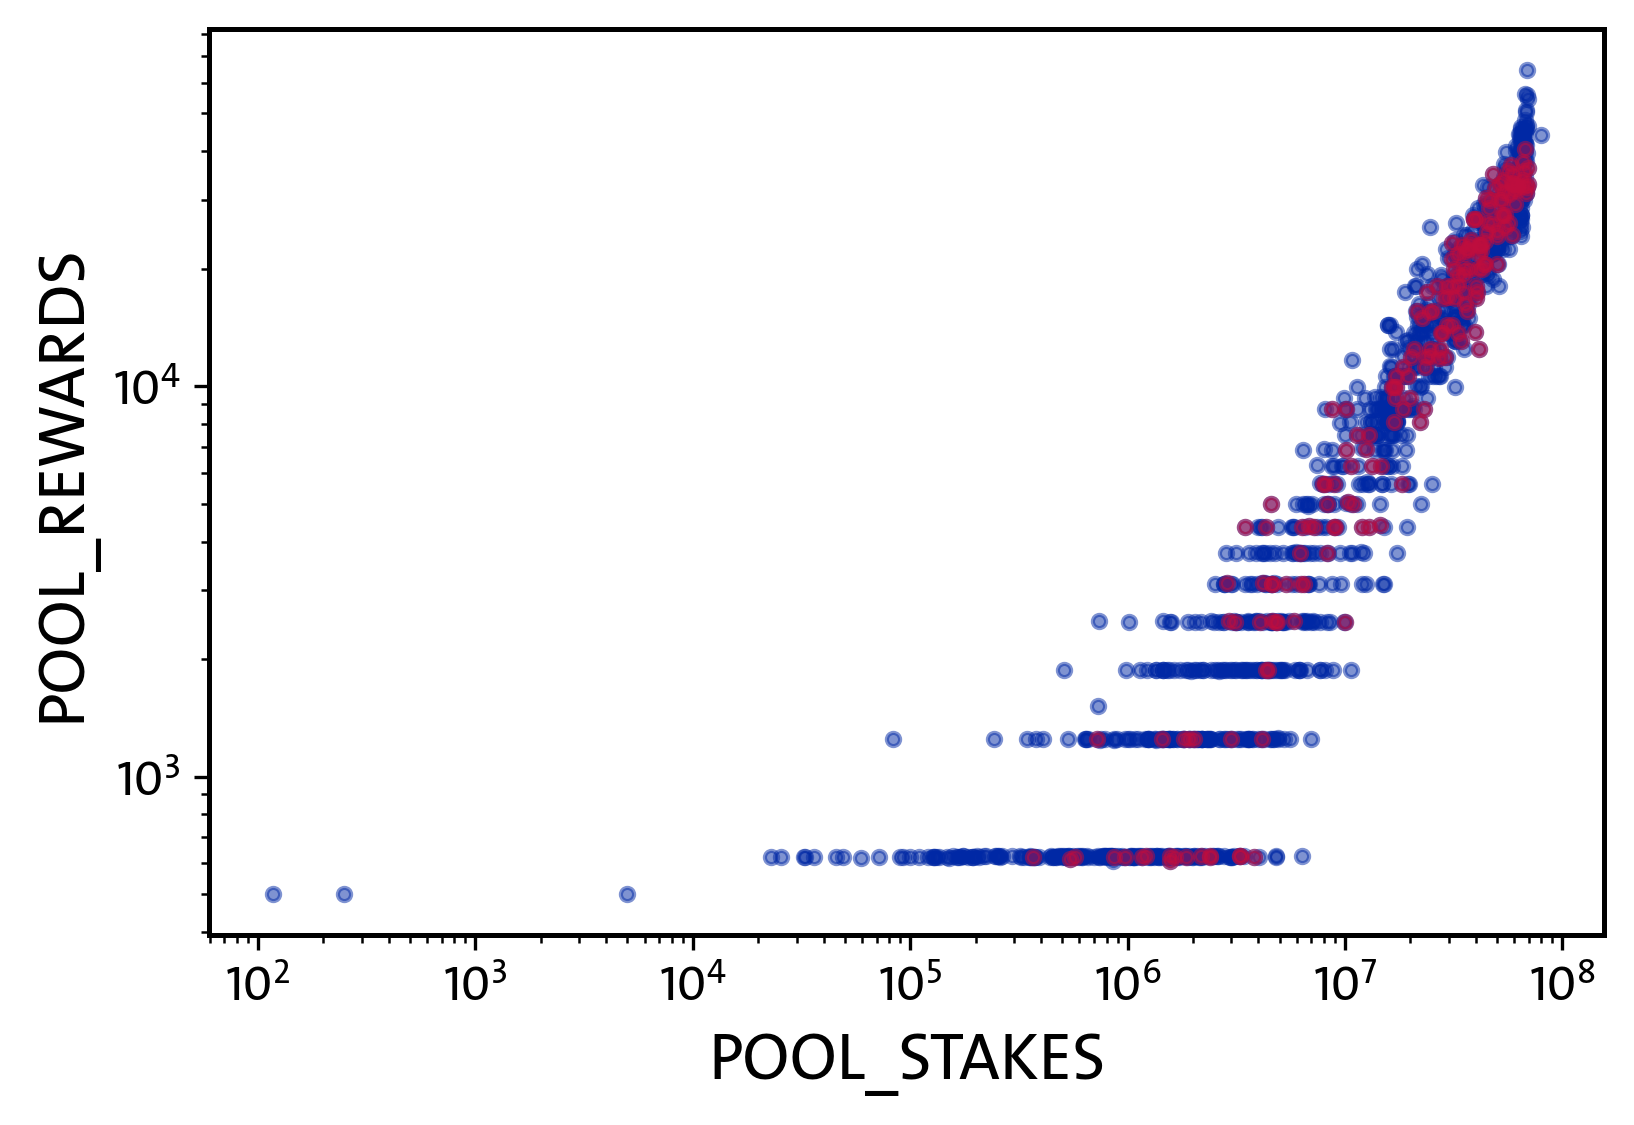

In [107]:
# Create a scatter plot
plt.scatter(filtered_and_selected_df_high['POOL_STAKES']/(1e+6), filtered_and_selected_df_high['POOL_REWARDS']/(1e+6), s=10, alpha=0.5)
plt.scatter(filtered_and_selected_df_low['POOL_STAKES']/(1e+6), filtered_and_selected_df_low['POOL_REWARDS']/(1e+6), s=10, alpha=0.5)

# Set the labels for x and y axes
plt.xlabel('POOL_STAKES')
plt.ylabel('POOL_REWARDS')

plt.xscale('log')
plt.yscale('log')

           
# Show the plot
plt.show()


In [ ]:
# low_reward_pools_SET_epoch_300 --> 223 / 3041
# low_reward_pools_SET_epoch_320 --> 227 / 3088
# low_reward_pools_SET_epoch_345 --> 233 / 3116
# low_reward_pools_SET_epoch_350 --> 186 / 3098

# len(low_reward_pools_SET_epoch_300.intersection(low_reward_pools_SET_epoch_320)) --> 121
# len(low_reward_pools_SET_epoch_300.intersection(low_reward_pools_SET_epoch_350)) --> 88
# len(low_reward_pools_SET_epoch_300.intersection(low_reward_pools_SET_epoch_345)) --> 116

# len(low_reward_pools_SET_epoch_320.intersection(low_reward_pools_SET_epoch_350)) --> 105
# len(low_reward_pools_SET_epoch_320.intersection(low_reward_pools_SET_epoch_345)) --> 130

# len(low_reward_pools_SET_epoch_345.intersection(low_reward_pools_SET_epoch_350)) --> 123

# len(low_reward_pools_SET_epoch_300.intersection(low_reward_pools_SET_epoch_320)
# .intersection(low_reward_pools_SET_epoch_345).intersection(low_reward_pools_SET_epoch_350)) --> 61



low_reward_pools_SET_epoch_xxx = low_reward_pools_SET
len(low_reward_pools_SET_epoch_xxx)



In [ ]:
# low_reawrd_entities_SET_epoch_300 --> 29,547
# low_reawrd_entities_SET_epoch_320 --> 21,403
# low_reawrd_entities_SET_epoch_345 --> 25,281
# low_reawrd_entities_SET_epoch_350 --> 21,656

# len(low_reawrd_entities_SET_epoch_300.intersection(low_reawrd_entities_SET_epoch_320)) --> 4,845
# len(low_reawrd_entities_SET_epoch_300.intersection(low_reawrd_entities_SET_epoch_345)) --> 4,215
# len(low_reawrd_entities_SET_epoch_300.intersection(low_reawrd_entities_SET_epoch_350)) --> 3,186

# len(low_reawrd_entities_SET_epoch_320.intersection(low_reawrd_entities_SET_epoch_345)) --> 9,875
# len(low_reawrd_entities_SET_epoch_320.intersection(low_reawrd_entities_SET_epoch_350)) --> 7,961

# len(low_reawrd_entities_SET_epoch_345.intersection(low_reawrd_entities_SET_epoch_350)) --> 20,278

# len(low_reawrd_entities_SET_epoch_300.intersection(low_reawrd_entities_SET_epoch_320)
# .intersection(low_reawrd_entities_SET_epoch_345).intersection(low_reawrd_entities_SET_epoch_350)) --> 1,605



low_reawrd_entities_SET_epoch_xxx = low_reawrd_entities_SET
len(low_reawrd_entities_SET_epoch_xxx)



----------------------
----------------------


  0%|          | 0/99 [00:00<?, ?it/s]/home/user/chegeni/miniconda3/envs/python_3_8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/user/chegeni/miniconda3/envs/python_3_8/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 99/99 [00:00<00:00, 12879.53it/s]


slope =  nan
intercept =  nan
r_value =  nan
p_value =  nan
std_err =  nan


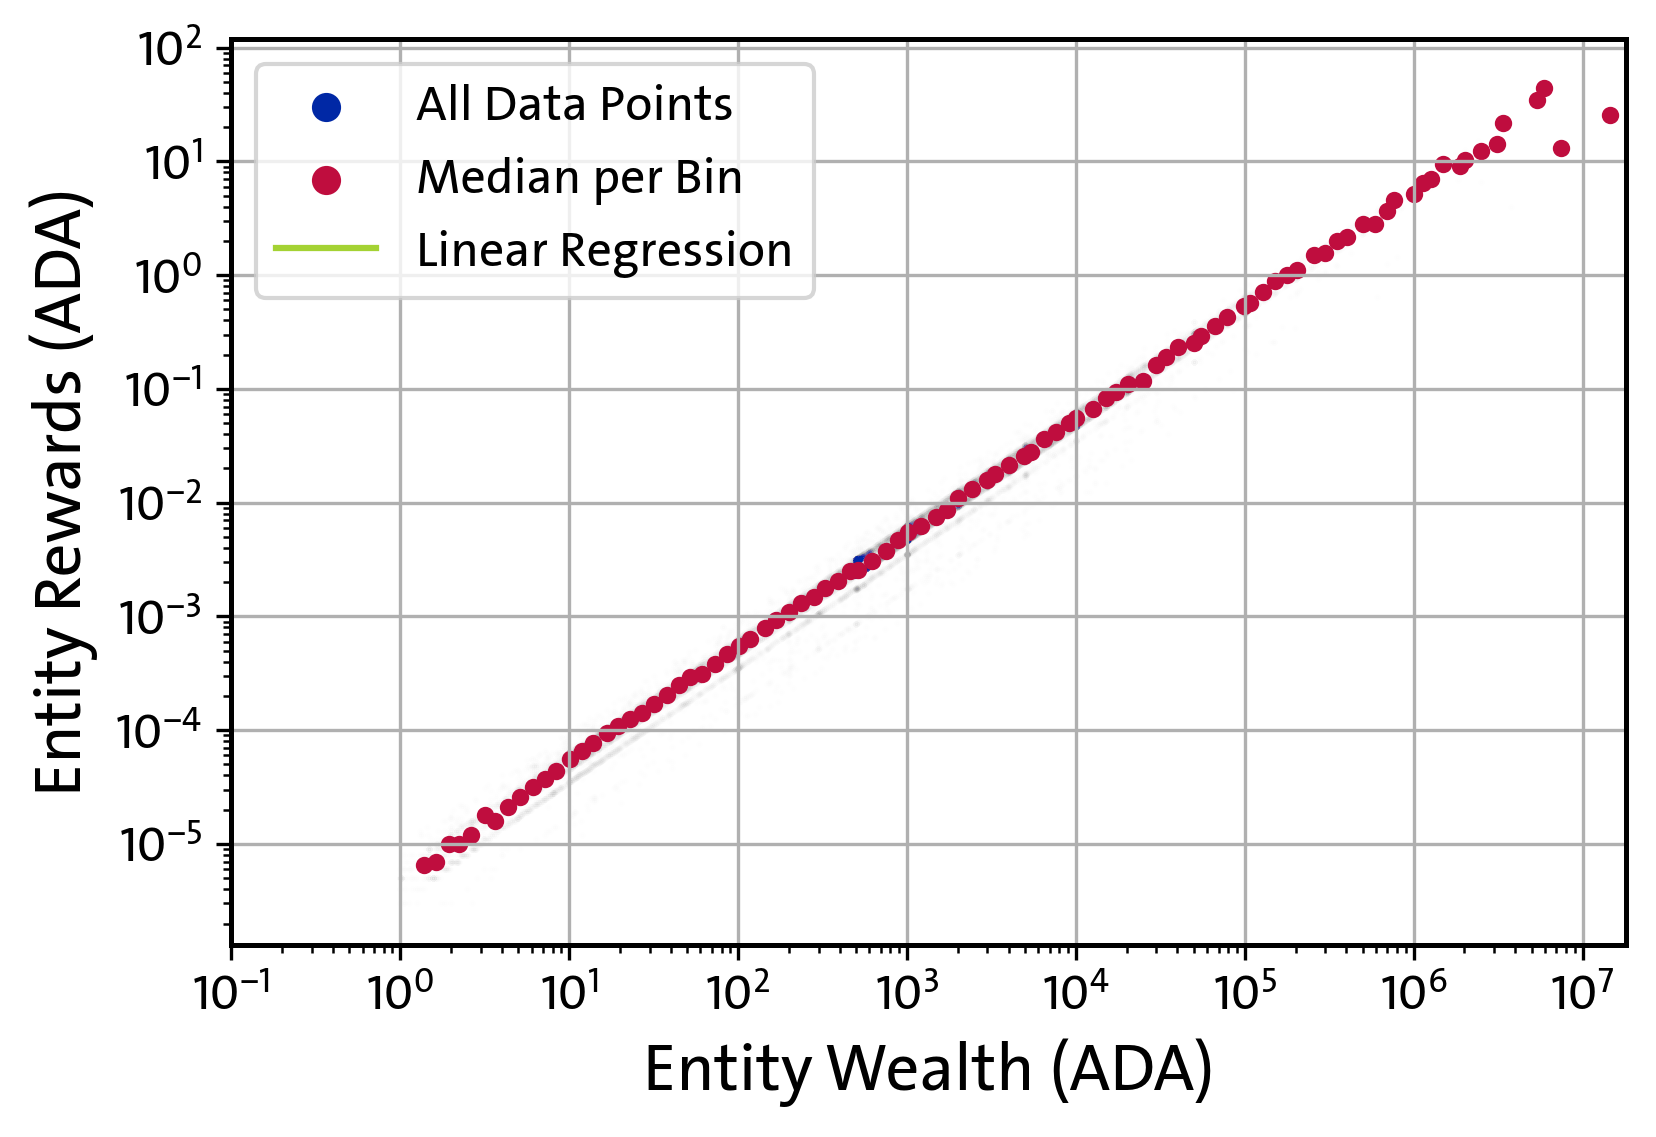

In [54]:
# Scatter Plot "Reward per epoch" vs "Entity Wealth" for all delegation events in all epochs:

from matplotlib import font_manager
font_dirs = ['/home/user/chegeni/fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

import matplotlib.pyplot as plt
from scipy.stats import linregress


##########################################################################################
print('----------------------')
print('----------------------')


# Unzip the list of pairs into two lists with the zip function
#x, y = zip(*rewarded_entities_AllEvents)
x = x_all
y = y_all


x = np.array(x, dtype=np.float64)
x = x/(10**6)  # convert lovelace to ADA
y = np.array(y, dtype=np.float64)
y = y/(10**6) # convert lovelace to ADA



#x = x[list(low_reward_events_SET)]
#y = y[list(low_reward_events_SET)]





# Replace zeros in y with a very small number
small_number = 1e-6
x[x == 0] = small_number
y[y == 0] = small_number


# Transforming data to log space
log_x = np.log10(x)
log_y = np.log10(y)

# Define bin edges in log space
bin_edges_x = np.logspace(0.1, np.max(log_x), 100)
#bin_edges_y = np.logspace(np.min(log_y), np.max(log_y), 100)

# Digitize/assign each point to a bin
bin_indices_x = np.digitize(log_x, bins=np.log10(bin_edges_x))
#bin_indices_y = np.digitize(log_y, bins=np.log10(bin_edges_y))


# Calculate mean/median in each bin
binned_data = []
for i in tqdm(range(1, len(bin_edges_x))):
    #for j in range(1, len(bin_edges_y)):
        # Find indices for each bin separately
        indices_x = np.where(bin_indices_x == i)
        #indices_y = np.where(bin_indices_y == j)
        
        # Find common indices
        #common_indices = np.intersect1d(indices_x, indices_y)

        if len(indices_x) > 0:
            median_x = np.median(x[indices_x])
            median_y = np.median(y[indices_x])
            binned_data.append((median_x, median_y))



# Extract binned data for plotting
binned_x, binned_y = zip(*binned_data)



# Perform linear regression
log_reg_x = np.log10(binned_x[0:-1])
log_reg_y = np.log10(binned_y[0:-1])
slope, intercept, r_value, p_value, std_err = linregress(log_reg_x, log_reg_y)
print('slope = ',     slope)
print('intercept = ', intercept)
print('r_value = ',   r_value)
print('p_value = ',   p_value)
print('std_err = ',   std_err)


# Create a figure and axis
fig, ax = plt.subplots()


# Create a scatter plot
scatter_plot1 = plt.scatter(x, y,               label='Scatter Plot', marker='o', s=0.5, alpha=0.002)
scatter_plot2 = plt.scatter(binned_x, binned_y, label='Scatter Plot', marker='o', s=10,  alpha=1)
plt.plot([], [])
plt.plot([], [])
plot3,         = plt.plot(10**log_reg_x, (10**intercept) * ((10**log_reg_x)**slope), label='Fitted Line')


#plt.legend(['All Data Points', 'Median per Bin'], handles=[legend_scatter], fontsize=8, loc ="lower right")
legend_scatter1 = plt.scatter([], [], alpha=1, color=scatter_plot1.get_facecolor()[0], label='All Data Points')
legend_scatter2 = plt.scatter([], [], alpha=1, color=scatter_plot2.get_facecolor()[0], label='Median per Bin')
legend_plot3    = plt.Line2D([], [], color=plot3.get_color(), label='Linear Regression')
plt.legend(handles=[legend_scatter1, legend_scatter2, legend_plot3], loc ="upper left")
legend_scatter1.remove()
legend_scatter2.remove()
#plt.legend(['Active Pools', 'Rewarded Pools'], loc ="lower right")





plt.xlabel('Entity Wealth (ADA)')
plt.ylabel('Entity Rewards (ADA)')


plt.xlim(left=0.1) #, int(10 * 10**6))
#plt.ylim(bottom=0.1) #, int(10 * 10**6))

plt.xscale('log')
plt.yscale('log')

# Optional: Customize the grid
plt.grid(True)


# Show the plot
#plt.savefig('fig_entities_rewards_vs_entityWealth.png', bbox_inches='tight', facecolor='white')
plt.show()





  0%|          | 0/99 [00:00<?, ?it/s]/home/user/chegeni/miniconda3/envs/python_3_8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/user/chegeni/miniconda3/envs/python_3_8/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 99/99 [00:00<00:00, 6962.14it/s]


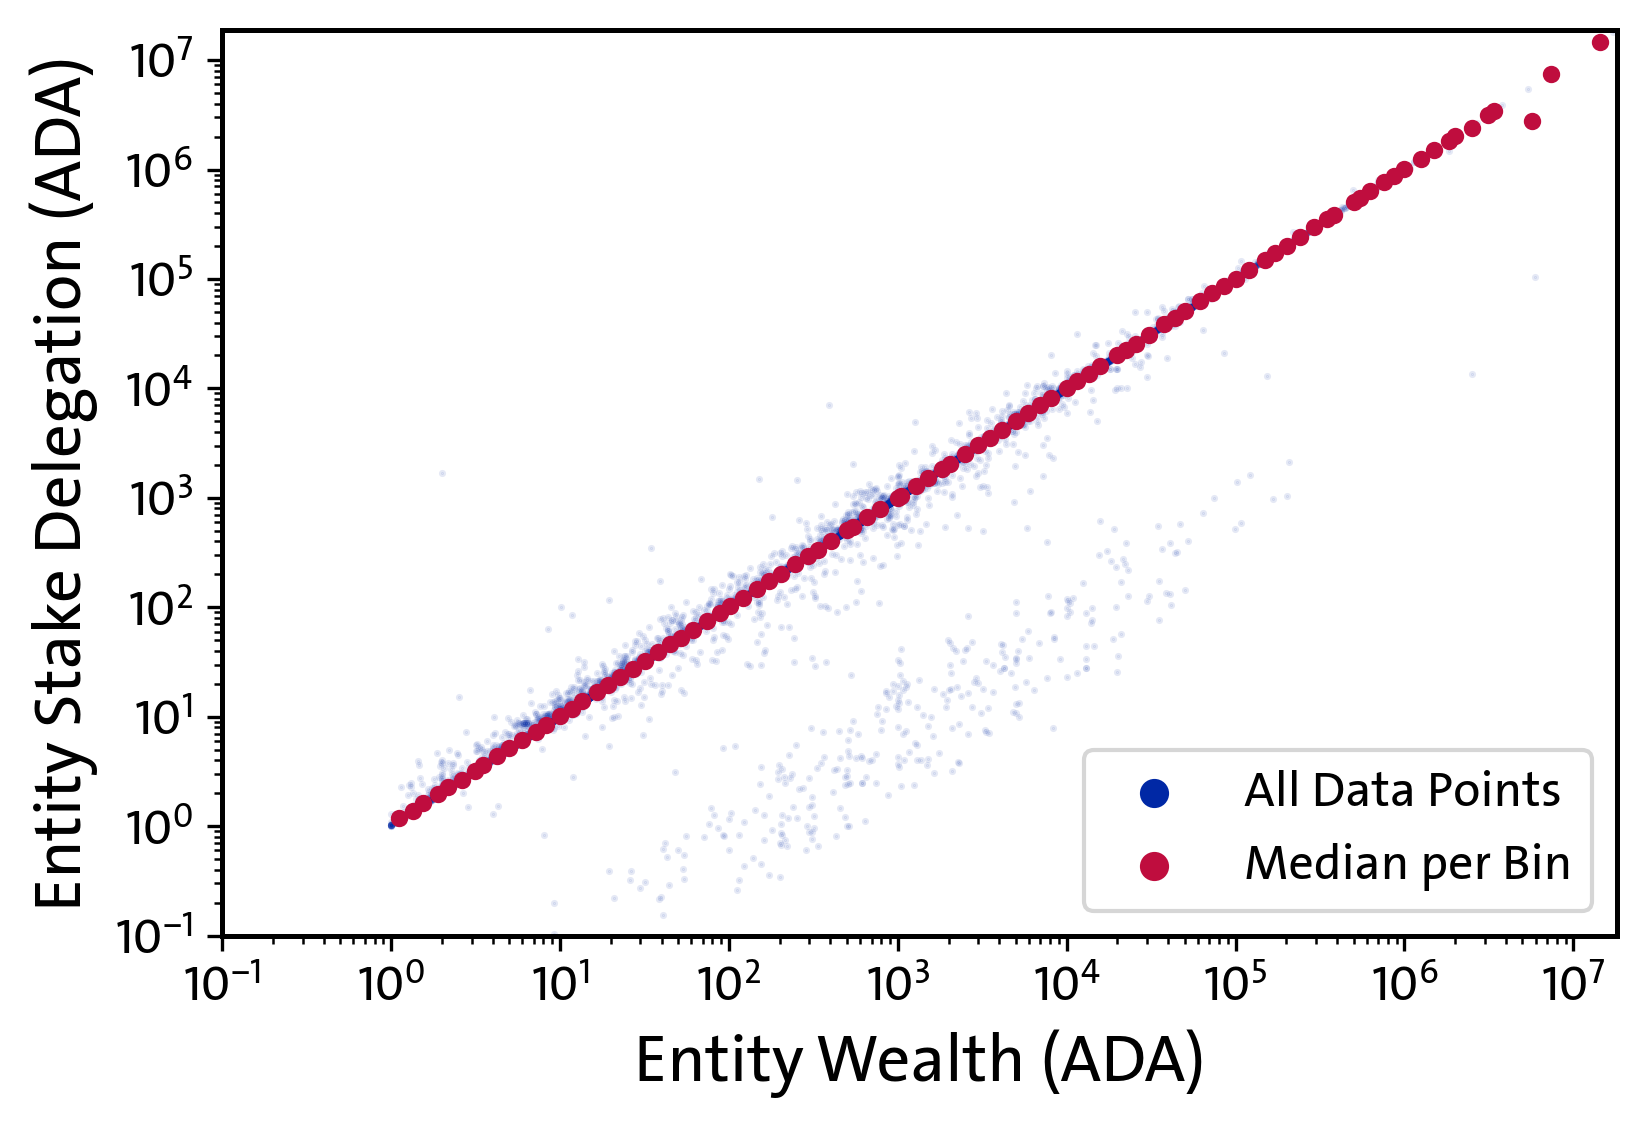

In [55]:
# Plot "Entity Stake Delegation (ADA)" vs. "Entity Wealth (ADA)":


import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

file_name = BASE_ADDRESS + '/YuZhang_Cardano_Balances_Entities/BalancesPerEntityDay_1750__Cardano_TXs_All.txt'
x = load_file_to_array(file_name)


file_name = BASE_ADDRESS + '/YuZhang_Cardano_StakeDelegation_Entities/StakeDelegPerEntityEpoch_0350__Cardano_TXs_All.txt'
y = load_file_to_array(file_name)


#x4 = num_of_entities_per_epoch_cumulative__LATEST
#y4 = count_cumulative_rewarded_pools_per_epoch



x = np.array(x, dtype=np.float64)
x = x/(10**6)  # convert lovelace to ADA
y = np.array(y, dtype=np.float64)
y = y/(10**6) # convert lovelace to ADA


x = x[list(low_reawrd_entities_SET)]
y = y[list(low_reawrd_entities_SET)]


#x4 = np.array(x4)
#y4 = np.array(y4)



# Replace zeros in y with a very small number
small_number = 1e-6
x[x == 0] = small_number
y[y == 0] = small_number


# Transforming data to log space
log_x = np.log10(x)
log_y = np.log10(y)

# Define bin edges in log space
bin_edges_x = np.logspace(0.01, np.max(log_x), 100)
#bin_edges_y = np.logspace(np.min(log_y), np.max(log_y), 100)

# Digitize/assign each point to a bin
bin_indices_x = np.digitize(log_x, bins=np.log10(bin_edges_x))
#bin_indices_y = np.digitize(log_y, bins=np.log10(bin_edges_y))


# Calculate mean/median in each bin
binned_data = []
for i in tqdm(range(1, len(bin_edges_x))):
    #for j in range(1, len(bin_edges_y)):
        # Find indices for each bin separately
        indices_x = np.where(bin_indices_x == i)
        #indices_y = np.where(bin_indices_y == j)
        
        # Find common indices
        #common_indices = np.intersect1d(indices_x, indices_y)

        if len(indices_x) > 0:
            median_x = np.median(x[indices_x])
            median_y = np.median(y[indices_x])
            binned_data.append((median_x, median_y))



# Extract binned data for plotting
binned_x, binned_y = zip(*binned_data)




# Create a figure and axis
fig, ax = plt.subplots()


# Create a scatter plot
scatter_plot1 = plt.scatter(x, y,               label='Scatter Plot', marker='o', s=0.5, alpha=0.1)
scatter_plot2 = plt.scatter(binned_x, binned_y, label='Scatter Plot', marker='o', s=10,  alpha=1)


legend_scatter1 = plt.scatter([], [], alpha=1, color=scatter_plot1.get_facecolor()[0], label='All Data Points')
legend_scatter2 = plt.scatter([], [], alpha=1, color=scatter_plot2.get_facecolor()[0], label='Median per Bin')
plt.legend(handles=[legend_scatter1, legend_scatter2], loc ="lower right")
legend_scatter1.remove()
legend_scatter2.remove()





plt.xlabel('Entity Wealth (ADA)')
plt.ylabel('Entity Stake Delegation (ADA)')

plt.xlim(left=0.1)   #, int(10 * 10**6))
plt.ylim(bottom=0.1) #, int(10 * 10**6))

plt.xscale('log')
plt.yscale('log')


# Show the plot
#plt.savefig('fig_EntityWealth_vs_EntityStakeDelegation.png', bbox_inches='tight', facecolor='white')
plt.show()

